# 20210827 Initial Analysis

In [31]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table, Column
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.analysis import plot_redu
from imaka.reduce import util
from astropy.stats import sigma_clipped_stats


import imaka.analysis.moffat as moffat
## Edit Me
from imaka.reduce.nights import reduce_2021_08_27 as redu
night = '20210827'
fld = 'Fld2'

root_dir = redu.root_dir
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
## Had an issue with stacking, the gfol
for key in list(redu.dict_images.keys()):
    for i in range(len(redu.dict_images[key])):
        img_num = redu.dict_images[key]
        suf = redu.dict_suffix[key]
        test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)
        
        stars = Table.read(root_dir + f'reduce/{fld}/' + test_img_base + '_clean_stars_stats_mdp.fits')
        print(f"key: {key} image {img_num[i]} stars: {len(stars)}")  

[autoreload of imaka.reduce.nights.reduce_2021_08_27 failed: Traceback (most recent call last):
  File "/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/opt/anaconda3/envs/astroconda/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/opt/anaconda3/envs/astroconda/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in

key: open_BRIV image 18 stars: 1080
key: open_BRIV image 21 stars: 761
key: open_BRIV image 24 stars: 623
key: open_BRIV image 27 stars: 787
key: open_BRIV image 33 stars: 1056
key: open_BRIV image 43 stars: 851
key: open_BRIV image 46 stars: 1035
key: LS_BRIV image 10 stars: 2655
key: LS_BRIV image 11 stars: 149
key: LS_BRIV image 13 stars: 3042
key: LS_BRIV image 16 stars: 2620
key: LS_BRIV image 19 stars: 2535
key: LS_BRIV image 25 stars: 2491
key: LS_BRIV image 28 stars: 2307
key: LS_BRIV image 31 stars: 2689
key: LS_BRIV image 41 stars: 1892
key: LS_BRIV image 44 stars: 2033
key: docz_BRIV image 14 stars: 3044
key: docz_BRIV image 17 stars: 2903
key: docz_BRIV image 20 stars: 2637
key: docz_BRIV image 23 stars: 2688
key: docz_BRIV image 26 stars: 2354
key: docz_BRIV image 29 stars: 2586
key: docz_BRIV image 32 stars: 2488
key: docz_BRIV image 42 stars: 1910
key: docz_BRIV image 45 stars: 2249
key: open_RIVB image 49 stars: 1098
key: open_RIVB image 52 stars: 920
key: open_RIVB ima

# 0. Plot: Single Image and starlists

In [58]:
# pick a file based on key
key = 'docz_BRIV'
i = 1
#####
img_num = redu.dict_images[key]
suf = redu.dict_suffix[key]
test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)

50% EE radius = 0.250"


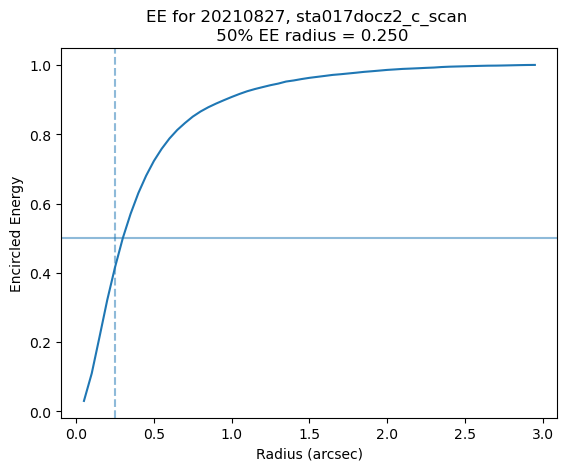

In [59]:
plot_redu.plot_ee_50(test_img_base, root_dir, fld, night)

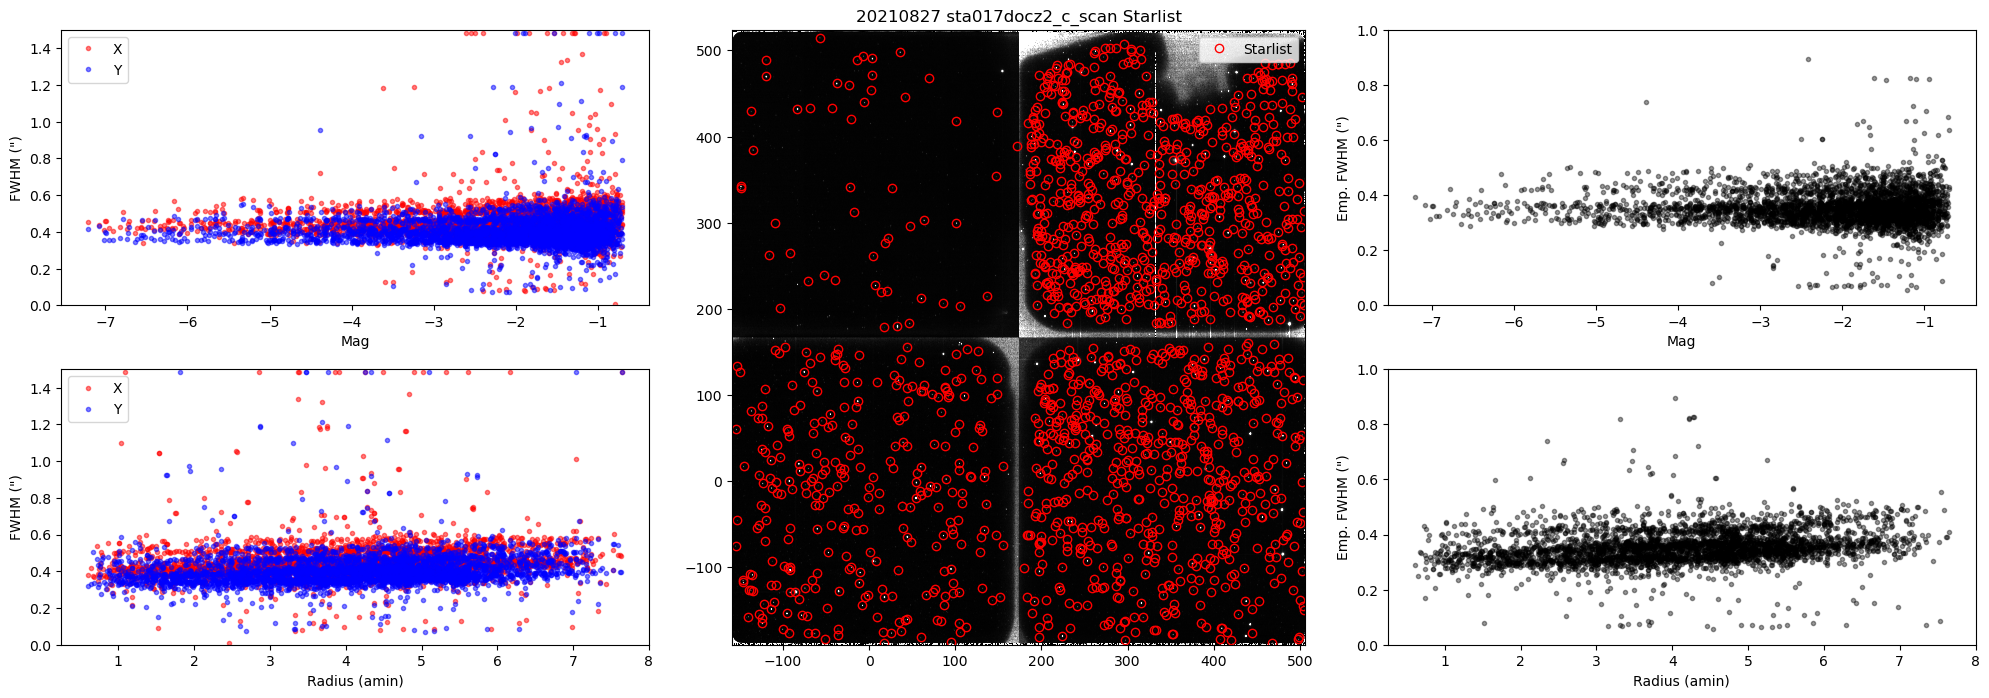

x: fwhm_x_avg = 0.44" fwhm_x_med = 0.44" fwhm_x_std = 0.06"
x: fwhm_x_avg = 0.44" fwhm_x_med = 0.44" fwhm_x_std = 0.06"


In [60]:
plot_redu.plot_starlist_stats(test_img_base, root_dir, fld, night)

In [5]:
from astropy import table
stars = table.Table.read(root_dir+'reduce/Fld2/sta021_o_scan_clean_stars.txt', format='ascii')

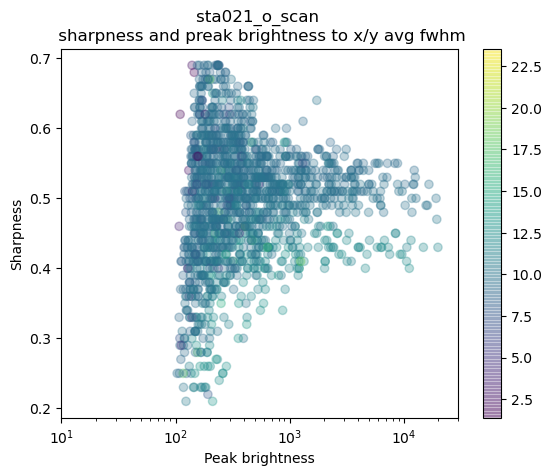

In [18]:
# num pix vs fwhm
plt.scatter(stars['peak'], stars['sharpness'], c=np.average([stars['x_fwhm'], stars['y_fwhm']], axis=0), alpha=0.3)
plt.xlim(10, 30000)
plt.xscale('log')
plt.xlabel("Peak brightness")
plt.ylabel("Sharpness")
plt.title(test_img_base+ " \n sharpness and preak brightness to x/y avg fwhm")
plt.colorbar()

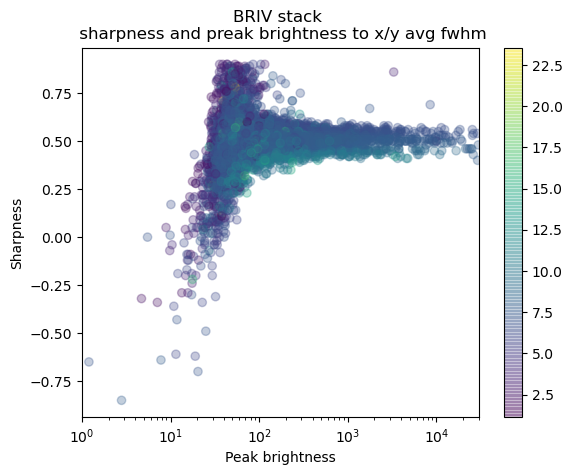

In [61]:
# num pix vs fwhm
stars1 = Table.read(root_dir + f'reduce/stacks/fld2_stack_LS_c_BRIV_stars.txt', format='ascii')
stars = stars1 #[stars1['x_fwhm'] > 3]
plt.scatter(stars['peak'], stars['sharpness'], c=np.average([stars['x_fwhm'], stars['y_fwhm']], axis=0), alpha=0.3)
plt.xlim(1, 30000)
plt.xscale('log')
plt.xlabel("Peak brightness")
plt.ylabel("Sharpness")
plt.title("BRIV stack"+ " \n sharpness and preak brightness to x/y avg fwhm")
plt.colorbar()

In [5]:
filt = "B"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
stats1 = Table.read(closed_file1)
scale = stats1.meta['SCALE']
scale

0.063

In [10]:
0.0822*10560 /60

14.467199999999998

In [49]:
stats_sing = Table.read(root_dir+'reduce/Fld2/sta021_o_scan_clean_stars_stats_mdp.fits')
stats_sing.add_column(Column(np.repeat('I', N_frames), name='filter'))

NameError: name 'N_frames' is not defined

In [134]:
from astropy.table import Column, Table
from astropy import table
ind_1 = [0, 1, 57, 56, 71, 72]
filt_1 = 'R'
N_frames = len(stats_sing)
stats_sing['filter'][ind_1] = np.repeat(filt_1, len(ind_1))

In [51]:
stats_sing = Table.read(root_dir+'reduce/Fld2/sta021_o_scan_clean_stars_stats.fits')
stats_sing

<Table length=955>
  id  xcentroid ycentroid ...        nea              fwhm_emp     
int64  float64   float64  ...      float64            float64      
----- --------- --------- ... ------------------ ------------------
   57  7255.104    82.348 ...  6118.426766843737 12.032988034037212
   72 10440.322      96.8 ...  6101.989795509652  14.31930502099004
   76   1722.17   102.673 ...  575.2993724861329  11.20679921711264
   94  3486.676   124.759 ...   919.299067139917 11.634897008407187
  106  10463.94   139.745 ...  33.16576676669162  14.44501632367366
  115  6093.343   151.548 ... 1155.7673727951283 13.525496581920688
  118  9466.344   154.796 ... 1164.3355433817633 14.487263597869138
  129  1960.896   162.814 ... 1390.5783574774277 12.796038662529194
  145  8130.697   179.575 ... 1380.1597197846377 14.406180819073164
  160  1412.699   195.036 ... 1349.7130027288028 15.130382352848267
  ...       ...       ... ...                ...                ...
 7880  6849.772 10094.324 ...  1415.726963149206 13.015060085591847
 7885  2434.885 10109.128 ... 1366.0911180496973  15.28277010512879
 7910    6675.1 10158.184 ...  364.4524035917479 12.358714163958567
 7923  3107.114 10177.051 ...  1430.157749898465 16.125955618713256
 7924  3121.577 10178.648 ... 1949.9838677310108 14.613272612354205
 7935  6698.877 10196.159 ... 1588.5050547721657 14.817470333836727
 7939   6716.38 10197.457 ... 1990.2506736451132 14.684544572316405
 7943  7540.213 10212.601 ...  1229.291910612887 15.152245863456827
 7956   7079.59 10247.168 ... 1046.5968272140544  12.64389011487157
 8022  1631.498 10424.142 ...    1340.9677368283 15.623875496067722

In [48]:
hdul = fits.open(root_dir+'reduce/Fld2/sta021_o_scan_clean_stars_stats_mdp.fits') 
hdul

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f8c4938d810>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f8c4a244510>]

In [35]:
calc_mof_fwhm(stats_file, filt=False, plate_scale=0.016)

<Table length=761>
  id  xcentroid ycentroid ...    Minor Alpha        Major Alpha    
int64  float64   float64  ...      float64            float64      
----- --------- --------- ... ------------------ ------------------
   57  7255.104    82.348 ... 11.658298128277835 29.918601556889197
   72 10440.322      96.8 ...  15.60051553691615  40.00761340455116
  106  10463.94   139.745 ... 14.166596275087299  34.73144562890517
  115  6093.343   151.548 ... 12.982334797507605  34.84995494957252
  118  9466.344   154.796 ... 14.487901083612936  37.55150999177516
  145  8130.697   179.575 ...  6.110674307660006  18.09975898858791
  160  1412.699   195.036 ... 20.411361125826055  43.21798411551866
  161  1537.859   194.704 ... 13.059873604562629 29.125159156296654
  163    1552.9    195.68 ...  11.88939512397713  44.37378390912528
  167  2949.473   203.899 ...  19.18904847927705 45.468337586027836
  ...       ...       ... ...                ...                ...
 7880  6849.772 10094.324 ... 15.739367087649695  35.96623204845915
 7885  2434.885 10109.128 ... 18.621419863863657  37.71412905545199
 7910    6675.1 10158.184 ...  9.704540064456326  23.52372086676975
 7923  3107.114 10177.051 ... 15.482301730724677 34.501715098635955
 7924  3121.577 10178.648 ...   9.34000171001778   32.7993496132383
 7935  6698.877 10196.159 ...  16.12468715865077  36.38080881275598
 7939   6716.38 10197.457 ... 11.987863344788432  51.67439964851433
 7943  7540.213 10212.601 ... 10.705829824473435 24.911194960537905
 7956   7079.59 10247.168 ... 12.479534639146014 28.086304348093115
 8022  1631.498 10424.142 ...  20.18780267093913   44.4773951527301

# 1. Stat Plots
Various measures of starlists. These mostly depend on each individual sarlist having stats calculated.

## 1.1. Plot: Moffat profile summary

Beta vs. minor alpha and Beta vs. phi

In [24]:
stats = Table.read(root_dir + 'reduce/stats/stats_docz_IVBR.fits')
print(stats.colnames)

['Image', 'FILTER', 'BINFAC', 'DATE_UTC', 'TIME_UTC', 'DATE_HST', 'TIME_HST', 'FWHM', 'FWHM_std', 'EE25', 'EE50', 'EE80', 'NEA', 'NEA2', 'xFWHM', 'yFWHM', 'theta', 'emp_fwhm', 'emp_fwhm_std', 'quadrant', 'Index', 'N Stars', 'N Sky', 'N Sky std', 'Amplitude', 'Amplitude std', 'Phi', 'Phi std', 'Beta', 'Beta std', 'Minor Alpha', 'Minor Alpha std', 'Major Alpha', 'Major Alpha std']


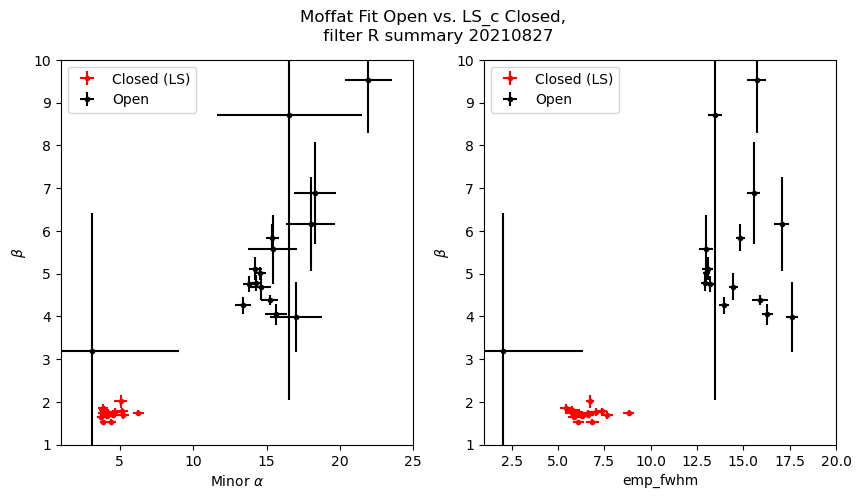

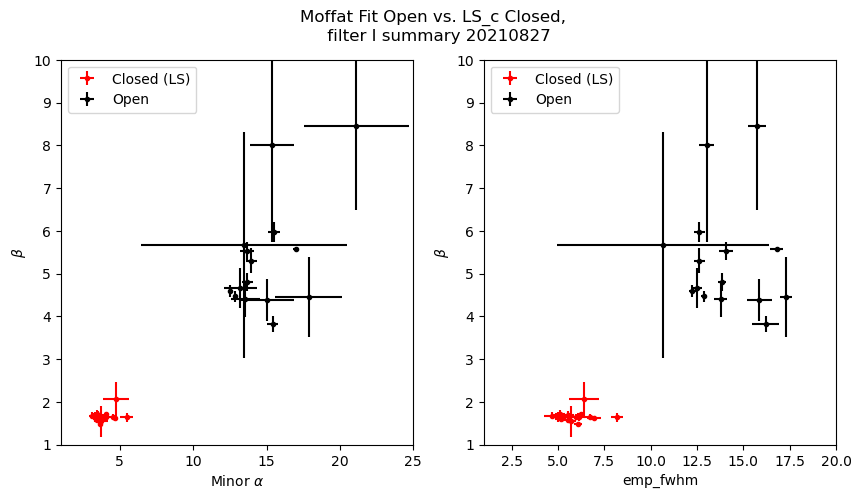

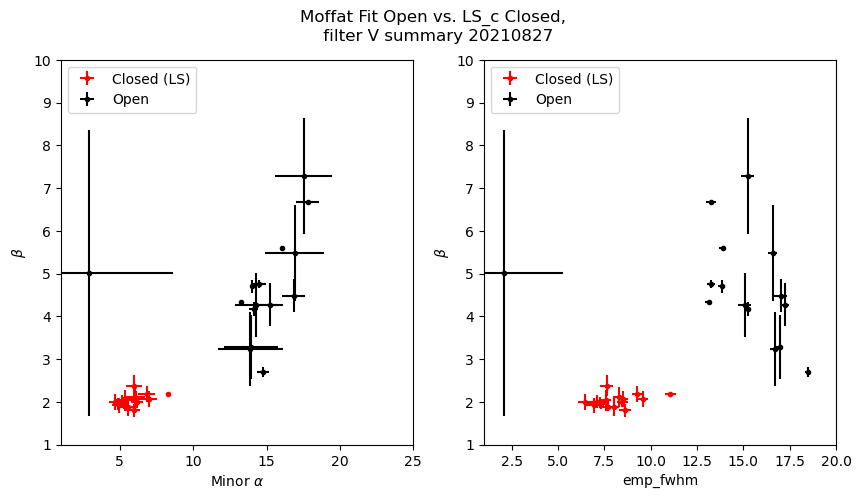

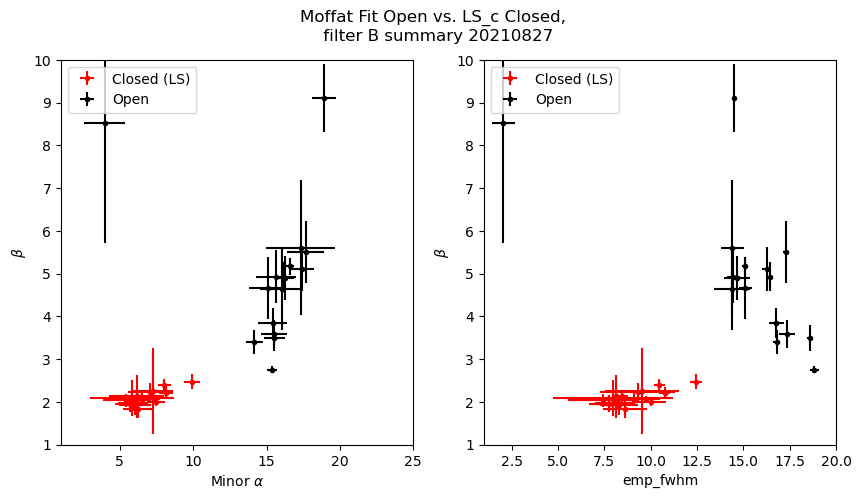

In [273]:
c_key = "LS_c"
plot_redu.plot_moffat_fit_4F("R", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("I", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("V", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("B", root_dir, c_key, fld, night)

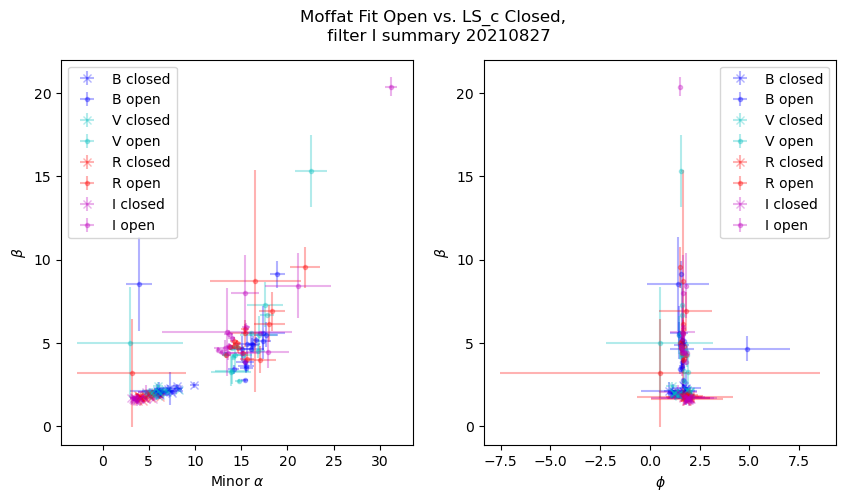

In [266]:
o_key = "_o"
c_key = "LS_c"
dict_filt = {"B":"b", "V":"c", "R":"r", "I":"m"}

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
for fil_band in dict_filt.keys():

    stats_c = Table.read(f'{root_dir}reduce/stats/stats_{c_key}_{fil_band}_mdp.fits')
    stats_o = Table.read(f'{root_dir}reduce/stats/stats_{o_key}_{fil_band}_mdp.fits')
    
    ax[0].errorbar(stats_c['Minor Alpha'], stats_c['Beta'], xerr=stats_c['Minor Alpha std'], yerr=stats_c['Beta std'], fmt=dict_filt[fil_band]+"x", label=f"{fil_band} closed", ecolor=dict_filt[fil_band], alpha = 0.3)
    ax[0].errorbar(stats_o['Minor Alpha'], stats_o['Beta'], xerr=stats_o['Minor Alpha std'], yerr=stats_o['Beta std'], fmt=dict_filt[fil_band]+".", label=f"{fil_band} open", ecolor=dict_filt[fil_band], alpha = 0.3)
    ax[0].set_xlabel(r'Minor $\alpha$')
    ax[0].set_ylabel(r'$\beta$')
    ax[0].legend()

    ax[1].errorbar(stats_c['Phi'], stats_c['Beta'], xerr=stats_c['Phi std'], yerr=stats_c['Beta std'], fmt=dict_filt[fil_band]+"x", label=f"{fil_band} closed", ecolor=dict_filt[fil_band], alpha = 0.3)
    ax[1].errorbar(stats_o['Phi'], stats_o['Beta'], xerr=stats_o['Phi std'], yerr=stats_o['Beta std'], fmt=dict_filt[fil_band]+".", label=f"{fil_band} open", ecolor=dict_filt[fil_band], alpha = 0.3)
    ax[1].set_xlabel(r'$\phi$')
    ax[1].set_ylabel(r'$\beta$')
    ax[1].legend()

    plt.suptitle(f"Moffat Fit Open vs. {c_key} Closed, \n filter {fil_band} summary {night}")


In [267]:
stats_c

<Table length=17>
                                  Image                                    ...
                                 bytes74                                   ...
-------------------------------------------------------------------------- ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/Fld2/sta010LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/Fld2/sta011LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/Fld2/sta013LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/Fld2/sta016LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/Fld2/sta019LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/Fld2/sta025LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/Fld2/sta028LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/Fld2/sta031LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/Fld2/sta041LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/Fld2/sta044LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/Fld2/sta047LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/Fld2/sta050LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/Fld2/sta053LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/Fld2/sta056LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/Fld2/sta059LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/Fld2/sta062LS_c_scan_clean.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/Fld2/sta065LS_c_scan_clean.fits ...

[]

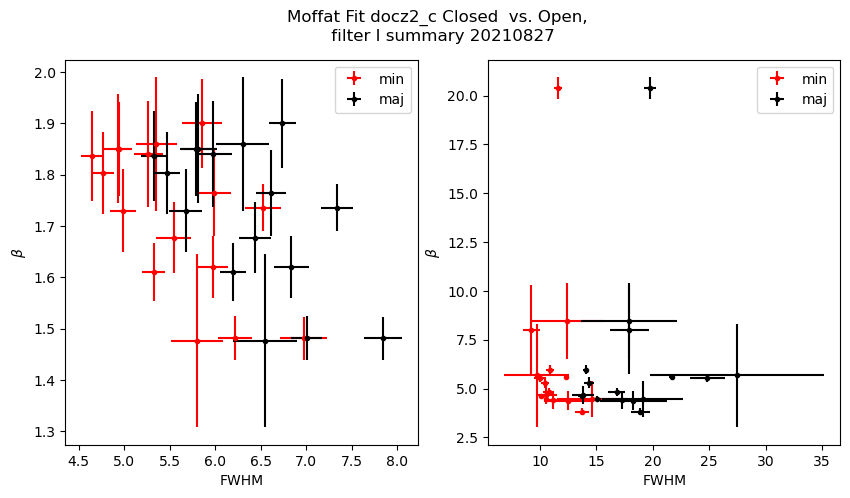

In [26]:
import imaka.analysis.moffat as moffat
fil_band = "I"
c_key = "docz2_c"

# want a FWHM vs. Beta /
stats_c = Table.read(f'{root_dir}reduce/stats/stats_{c_key}_{fil_band}_mdp.fits')
stats_o = Table.read(f'{root_dir}reduce/stats/stats__o_{fil_band}_mdp.fits')

FWHM_min, sig_FWHM_min, FWHM_maj, sig_FWHM_maj = moffat.calc_mof_fwhm(f'{root_dir}reduce/stats/stats_{c_key}_{fil_band}_mdp.fits', filt=False, plate_scale=1)

plt.figure(figsize=(10,5))
plt.clf()
plt.subplot(121)
plt.errorbar(FWHM_min, stats_c['Beta'], xerr=sig_FWHM_min, yerr=stats_c['Beta std'], fmt='r.', label='min')
plt.errorbar(FWHM_maj, stats_c['Beta'], xerr=sig_FWHM_maj, yerr=stats_c['Beta std'], fmt='k.', label='maj')
plt.xlabel(r'FWHM')
plt.ylabel(r'$\beta$')
plt.legend()

FWHM_min, sig_FWHM_min, FWHM_maj, sig_FWHM_maj = moffat.calc_mof_fwhm(f'{root_dir}reduce/stats/stats__o_{fil_band}_mdp.fits', filt=False, plate_scale=1)

plt.subplot(122)
plt.errorbar(FWHM_min, stats_o['Beta'], xerr=sig_FWHM_min, yerr=stats_o['Beta std'], fmt='r.', label='min')
plt.errorbar(FWHM_maj, stats_o['Beta'], xerr=sig_FWHM_maj, yerr=stats_o['Beta std'], fmt='k.', label='maj')
plt.xlabel(r'FWHM')
plt.ylabel(r'$\beta$')
plt.legend()

plt.suptitle(f"Moffat Fit {c_key} Closed  vs. Open, \n filter {fil_band} summary {night}")
plt.plot()

### Beta vs. Mag on Stacks

Text(0.5, 0.98, 'Moffat Fit Open vs.Closed, \n 20210827 STACK for LS_c filter order RIVB')

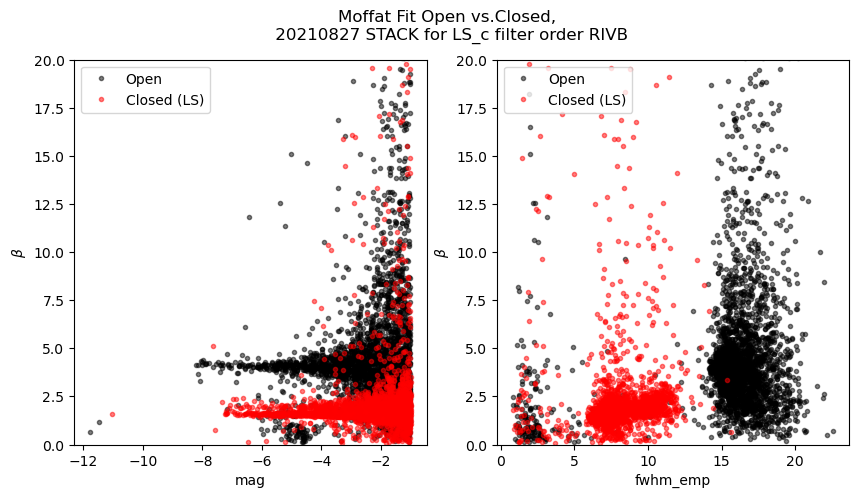

In [248]:
# Stacked image moffat fit values
c_key = "LS_c"
filt_key = "RIVB"
stats_c = Table.read(f'{root_dir}reduce/stacks/fld2_stack_{c_key}_{filt_key}_stars_stats_mdp.fits')
stats_o = Table.read(f'{root_dir}reduce/stacks/fld2_stack__o_{filt_key}_stars_stats_mdp.fits')

plt.figure(figsize=(10,5))
plt.clf()
plt.subplot(121)
plt.errorbar(stats_o['mag'], stats_o['Beta'],  fmt='k.', label='Open', alpha=0.5)
plt.errorbar(stats_c['mag'], stats_c['Beta'],  fmt='r.', label='Closed (LS)', alpha=0.5)
plt.xlabel(r'mag')
plt.ylabel(r'$\beta$')
plt.ylim(0,20)
plt.legend()

plt.subplot(122)
plt.errorbar(stats_o['fwhm_emp'], stats_o['Beta'], fmt='k.', label='Open', alpha=0.5)
plt.errorbar(stats_c['fwhm_emp'], stats_c['Beta'],  fmt='r.', label='Closed (LS)', alpha=0.5)

plt.xlabel(r'fwhm_emp')
plt.ylabel(r'$\beta$')
plt.legend()
plt.ylim(0,20)

plt.suptitle(f"Moffat Fit Open vs.Closed, \n {night} STACK for {c_key} filter order {filt_key}")

[]

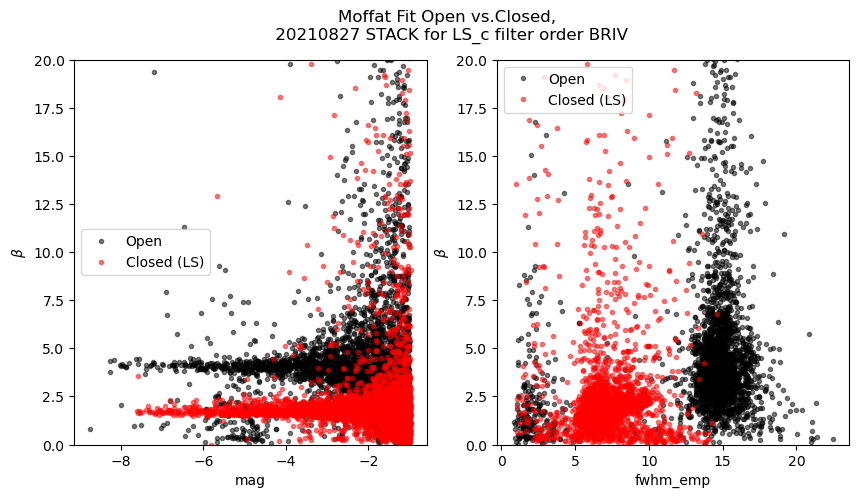

In [250]:
# Stacked image moffat fit values
c_key = "LS_c"
filt_key = "BRIV"
stats_c = Table.read(f'{root_dir}reduce/stacks/fld2_stack_{c_key}_{filt_key}_stars_stats_mdp.fits')
stats_o = Table.read(f'{root_dir}reduce/stacks/fld2_stack__o_{filt_key}_stars_stats_mdp.fits')

plt.figure(figsize=(10,5))
plt.clf()
plt.subplot(121)
plt.errorbar(stats_o['mag'], stats_o['Beta'],  fmt='k.', label='Open', alpha=0.5)
plt.errorbar(stats_c['mag'], stats_c['Beta'],  fmt='r.', label='Closed (LS)', alpha=0.5)
plt.xlabel(r'mag')
plt.ylabel(r'$\beta$')
plt.ylim(0,20)
plt.legend()

plt.subplot(122)
plt.errorbar(stats_o['fwhm_emp'], stats_o['Beta'], fmt='k.', label='Open', alpha=0.5)
plt.errorbar(stats_c['fwhm_emp'], stats_c['Beta'],  fmt='r.', label='Closed (LS)', alpha=0.5)

plt.xlabel(r'fwhm_emp')
plt.ylabel(r'$\beta$')
plt.legend()
plt.ylim(0,20)

plt.suptitle(f"Moffat Fit Open vs.Closed, \n {night} STACK for {c_key} filter order {filt_key}")
plt.plot()

## Beta vs. FWHM for wavelength

In [116]:
# source: https://www.mit.edu/~iancross/python/_modules/analysis.html#medianr
def removeoutliers(data, nsigma, remove='both', center='mean', niter=Inf, retind=False, verbose=False):
    """Strip outliers from a dataset, iterating until converged.

    :INPUT:
      data -- 1D numpy array.  data from which to remove outliers.

      nsigma -- positive number.  limit defining outliers: number of
                standard deviations from center of data.

    :OPTIONAL INPUTS:               
      remove -- ('min'|'max'|'both') respectively removes outliers
                 below, above, or on both sides of the limits set by
                 nsigma.

      center -- ('mean'|'median'|value) -- set central value, or
                 method to compute it.

      niter -- number of iterations before exit; defaults to Inf,
               which can occasionally result in empty arrays returned

      retind -- (bool) whether to return index of good values as
                second part of a 2-tuple.

    :EXAMPLE: 
       ::

           from numpy import hist, linspace, randn
           from analysis import removeoutliers
           data = randn(1000)
           hbins = linspace(-5,5,50)
           d2 = removeoutliers(data, 1.5, niter=1)
           hist(data, hbins)
           hist(d2, hbins)

       """
    # 2009-09-04 13:24 IJC: Created
    # 2009-09-24 17:34 IJC: Added 'retind' feature.  Tricky, but nice!
    # 2009-10-01 10:40 IJC: Added check for stdev==0
    # 2009-12-08 15:42 IJC: Added check for isfinite

    from numpy import median, ones, isfinite

    def getcen(data, method):
        "Get central value of a 1D array (helper function)"
        if method.__class__==str:
            if method=='median':
                cen = median(data)
            else:
                cen = data.mean()
        else:
            cen = method
        return cen

    def getgoodindex(data, nsigma, center, stdev, remove):
        "Get number of outliers (helper function!)"
        if stdev==0:
            distance = data*0.0
        else:
            distance = (data-center)/stdev
        if remove=='min':
            goodind = distance>-nsigma
        elif remove=='max':
            goodind = distance<nsigma
        else:
            goodind = abs(distance)<=nsigma
        return goodind

    data = data.ravel().copy()

    ndat0 = len(data)
    ndat = len(data)
    iter=0
    goodind = ones(data.shape,bool)
    goodind *= isfinite(data)
    while ((ndat0<>ndat) or (iter==0)) and (iter<niter) and (ndat>0) :
        ndat0 = len(data[goodind])
        cen = getcen(data[goodind], center)
        stdev = data[goodind].std()
        thisgoodind = getgoodindex(data[goodind], nsigma, cen, stdev, remove)
        goodind[find(goodind)] = thisgoodind
        if verbose:
            print "cen>>",cen
            print "std>>",stdev
        ndat = len(data[goodind])
        iter +=1
        if verbose:
            print ndat0, ndat
    if retind:
        ret = data[goodind], goodind
    else:
        ret = data[goodind]
    return ret

SyntaxError: invalid syntax (1192736259.py, line 76)

In [ ]:
# Radial Cut Function
# input: as stats table, width, and cut from center
# output: the stats table with the non-center 

def radial_cut(stats, width, radius):
    

In [141]:
reload(moffat)

<module 'imaka.analysis.moffat' from '/u/eden/code/imaka/imaka/analysis/moffat.py'>

### $Beta$ vs FWHM, Individual images
This looks at the combined individual images and standard deviation on them. 

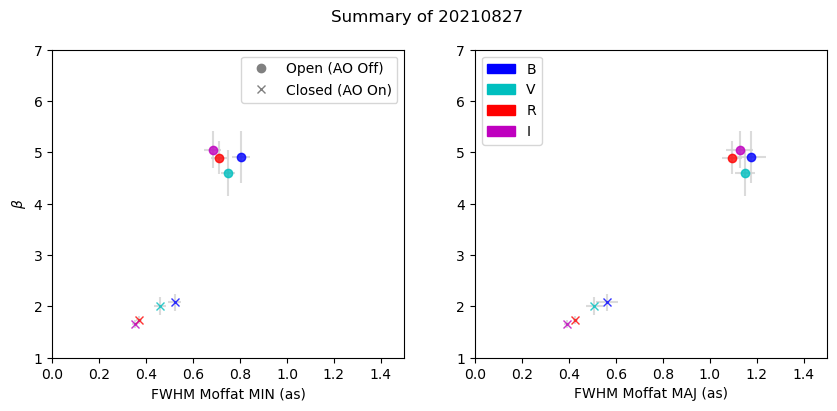

In [326]:
# outlier rejection for all filters
c_key = "LS_c"
filters = ["B", "V", "R", "I"]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
dict_filt = {"B":"b", "V":"c", "R":"r", "I":"m"}
f_key = [c_key, "o"]
f_fmt = ["x", "o"]
f_fmt_name = { "Open (AO Off)":'o', 'Closed (AO On)':'x'}

# iterate through filters
for fil_band in filters:
    f_closed = f'{root_dir}reduce/stats/stats_{c_key}_{fil_band}_mdp.fits'
    f_open = f'{root_dir}reduce/stats/stats__o_{fil_band}_mdp.fits'
    ##f_tt = f'{root_dir}reduce/stats/stats_tt_c_{fil_band}_mdp.fits'
    
    files = [f_closed, f_open]

    # TODO: outlier rejection
    #pt2
    
    for e, stat_f in enumerate(files):
        stats = Table.read(stat_f)
        FWHM_min, sig_FWHM_min, FWHM_maj, sig_FWHM_maj = moffat.calc_mof_fwhm(stat_f, filt=False, plate_scale=stats.meta['SCALE'])
        ax[0].errorbar(np.median(FWHM_min), np.median(stats['Beta']), xerr=np.median(sig_FWHM_min), yerr=np.median(stats['Beta std']), fmt=dict_filt[fil_band]+f_fmt[e], label=f"{fil_band} {f_key[e]}", ecolor='lightgray', alpha = 0.8)
        ax[1].errorbar(np.median(FWHM_maj), np.median(stats['Beta']), xerr=np.median(sig_FWHM_maj), yerr=np.median(stats['Beta std']), fmt=dict_filt[fil_band]+f_fmt[e], label=f"{fil_band} {f_key[e]}", ecolor='lightgray', alpha = 0.8)
    
    
ax[0].set_xlabel(r'FWHM Moffat MIN (as)')
ax[1].set_xlabel(r'FWHM Moffat MAJ (as)')
ax[0].set_ylabel(r'$\beta$')

import matplotlib.lines as mlines
import matplotlib.patches as mpatches
ax[0].legend(handles=[mlines.Line2D([0], [0], marker=value, label=key, color='grey',  lw=0) for key, value in f_fmt_name.items()])
ax[1].legend(handles=[mpatches.Patch(color=value, label=key) for key, value in dict_filt.items()], loc=2)


ax[1].set_ylim(1, 7)    
ax[0].set_ylim(1, 7)

ax[1].set_xlim(0, 1.5)    
ax[0].set_xlim(0, 1.5)

#ax[0].legend(loc='upper left')
#ax[1].legend(loc='upper left')

#plt.suptitle(f"Moffat Fit {c_key} Min and Maj Moffat FWHM, \n summary for {night}, IVBR and VBRI")
plt.suptitle(f"Summary of {night}")
plt.plot()
plt.savefig('../LT_betavFWHM.png', dpi=300)


### $Beta$ vs FWHM, Stacked images
This looks at the stackes images and standard deviation calculated in the moffat fitting. 

[]

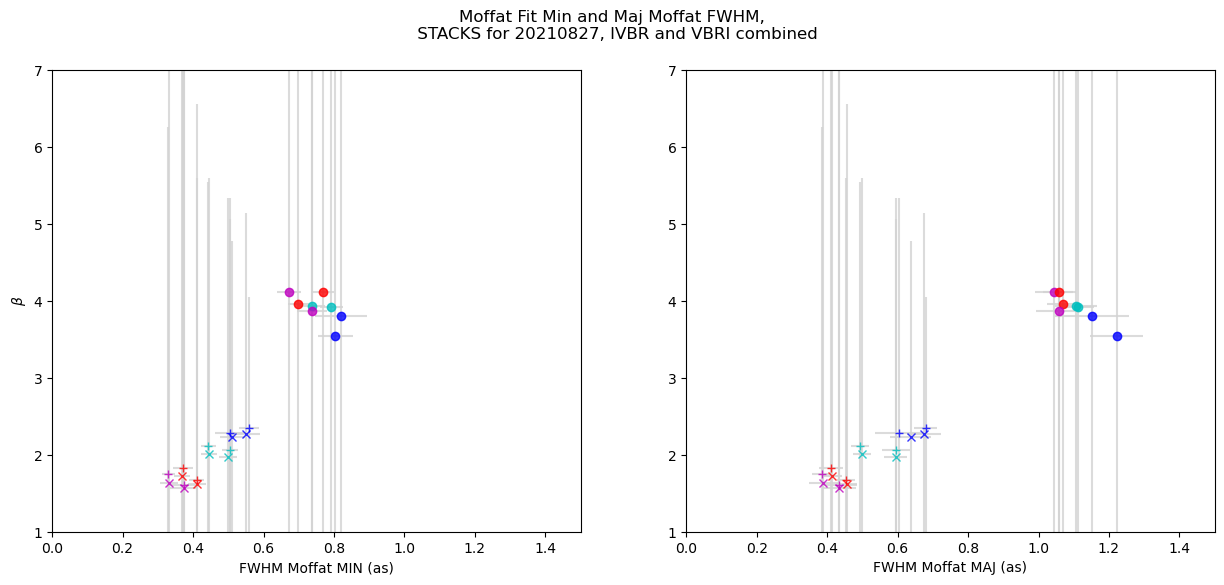

In [204]:
# outlier rejection for all filters
c_key = "LS_c"
filters = ["B", "V", "R", "I"]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,6))
dict_filt = {"B":"b", "V":"c", "R":"r", "I":"m"}
f_fmt = {"_o":'o', 'LS_c':'x', 'docz2_c':'+', 'tt_c':'^'}

stats_stacked = Table.read(redu.stats_dir + 'stats_stacks.fits')
#stats_stacked_mdp = Table.read(redu.stats_dir + 'stats_stacks_mdp.fits')
status = ["_".join(img.split("_")[-3:-1]) for img in stats_stacked["Image"]]
labels = [stats_stacked["FILTER"][i]+status[i] for i in range(len(status))]

FWHM_min, sig_FWHM_min, FWHM_maj, sig_FWHM_maj = moffat.calc_mof_fwhm_data(stats_stacked, filt=False, plate_scale=stats.meta['SCALE'])

for i in range(len(status)):
    ax[0].errorbar(FWHM_min[i], stats_stacked['Beta'][i], xerr=sig_FWHM_min[i], yerr=stats_stacked['Beta std'][i], fmt=dict_filt[stats_stacked["FILTER"][i]]+f_fmt[status[i]], ecolor='lightgray', alpha = 0.8)
    ax[1].errorbar(FWHM_maj[i], stats_stacked['Beta'][i], xerr=sig_FWHM_maj[i], yerr=stats_stacked['Beta std'][i], fmt=dict_filt[stats_stacked["FILTER"][i]]+f_fmt[status[i]], ecolor='lightgray', alpha = 0.8)
    
ax[0].set_xlabel(r'FWHM Moffat MIN (as)')
ax[1].set_xlabel(r'FWHM Moffat MAJ (as)')
ax[0].set_ylabel(r'$\beta$')

ax[1].set_ylim(1, 7)    
ax[0].set_ylim(1, 7)

ax[1].set_xlim(0, 1.5)    
ax[0].set_xlim(0, 1.5)

#ax[0].legend(loc='upper left')
#ax[1].legend(loc='upper left')

plt.suptitle(f"Moffat Fit Min and Maj Moffat FWHM, \n STACKS for {night}, IVBR and VBRI combined")
plt.plot()

### Jitter: Difference between MIN and MAJ
Here we look at the impact of jitter by comparing major and minor axes

[]

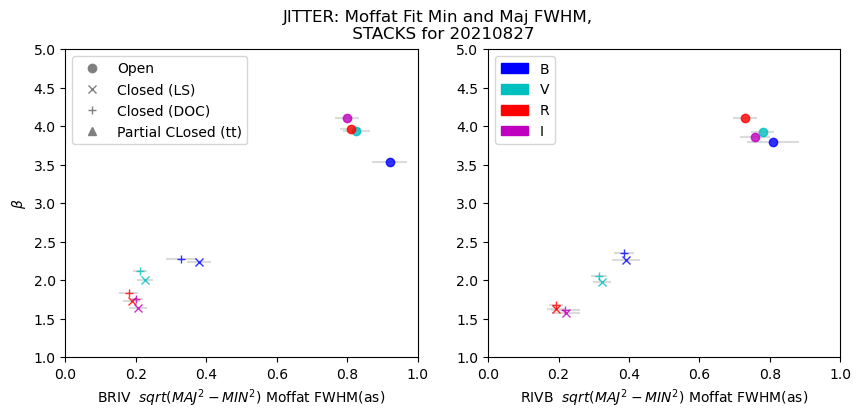

In [319]:
# outlier rejection for all filters
filters = ["B", "V", "R", "I"]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
dict_filt = {"B":"b", "V":"c", "R":"r", "I":"m"}
f_fmt = { 'LS_c':'x', 'docz2_c':'+', 'tt_c':'^', "_o":'o'}
f_fmt_name = { "Open":'o', 'Closed (LS)':'x', 'Closed (DOC)':'+', 'Partial CLosed (tt)':'^'}
orders = ['BRIV', 'RIVB']


stats_stacked = Table.read(redu.stats_dir + 'stats_stacks.fits')
#stats_stacked_mdp = Table.read(redu.stats_dir + 'stats_stacks_mdp.fits')
status = ["_".join(img.split("_")[-3:-1]) for img in stats_stacked["Image"]]
labels = [stats_stacked["FILTER"][i]+status[i] for i in range(len(status))]
fmts_use = [dict_filt[stats_stacked["FILTER"][i]]+f_fmt[status[i]] for i in range(len(status))]

FWHM_min, sig_FWHM_min, FWHM_maj, sig_FWHM_maj = moffat.calc_mof_fwhm_data(stats_stacked, filt=False, plate_scale=stats_stacked.meta['SCALE'])

for i in range(len(status)):
    index = orders.index(stats_stacked['F_ORD'][i])
    ax[index].errorbar(np.sqrt(FWHM_maj[i]**2 - FWHM_min[i]**2), stats_stacked['Beta'][i], xerr=sig_FWHM_min[i], fmt=dict_filt[stats_stacked["FILTER"][i]]+f_fmt[status[i]], ecolor='lightgray', alpha = 0.8)

ax[0].set_xlabel(f'{orders[0]}  $sqrt(MAJ^2 - MIN^2)$ Moffat FWHM(as)')
ax[1].set_xlabel(f'{orders[1]}  $sqrt(MAJ^2 - MIN^2)$ Moffat FWHM(as)')
ax[0].set_ylabel(r'$\beta$')

import matplotlib.lines as mlines
import matplotlib.patches as mpatches
ax[0].legend(handles=[mlines.Line2D([0], [0], marker=value, label=key, color='grey',  lw=0) for key, value in f_fmt_name.items()])
ax[1].legend(handles=[mpatches.Patch(color=value, label=key) for key, value in dict_filt.items()], loc=2)


ax[1].set_ylim(1, 5)    
ax[0].set_ylim(1, 5)

ax[1].set_xlim(0, 1)    
ax[0].set_xlim(0, 1)

plt.suptitle(f"JITTER: Moffat Fit Min and Maj FWHM, \n STACKS for {night}")
plt.plot()

### FA vs. FWHM
Here we want to know how the seperation from center affects FWHM from the stacked image starlists. 

In [ ]:
c_key = 'LS_c'
o_key = '_o'
odr ='BRIV'
width = 10560
dict_filt = {"B":"b", "V":"c", "R":"r", "I":"m"}

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,6))

for filt in dict_filt.keys():
    stats_stacked_c_mdp = f'{redu.stacks_dir}fld2_stack_{c_key}_{odr}_{filt}_{odr}_stars_stats_mdp.fits'
    stats_stacked_o_mdp = f'{redu.stacks_dir}fld2_stack_{o_key}_{odr}_{filt}_{odr}_stars_stats.fits'
    stats_c = Table.read(stats_stacked_c_mdp)
    stats_o = Table.read(stats_stacked_o_mdp)

    stats_c['FA'] = np.sqrt( (stats_c['xcentroid']-width/2)**2 + (stats_c['ycentroid']-width/2)**2 )*stats_c.meta['SCALE']
    stats_o['FA'] = np.sqrt( (stats_o['xcentroid']-width/2)**2 + (stats_o['ycentroid']-width/2)**2 )*stats_o.meta['SCALE']
    #FWHM_min, sig_FWHM_min, FWHM_maj, sig_FWHM_maj = moffat.calc_mof_fwhm(stats_stacked_c, filt=False, plate_scale=stats.meta['SCALE'])

    ax[0].scatter(stats_c['FA'], stats_c['fwhm_emp']*stats_c.meta['SCALE'], c=dict_filt[filt], label = f'{filt} {c_key}', alpha = 0.5, s = 1)
    ax[1].scatter(stats_o['FA'], stats_o['fwhm_emp']*stats_o.meta['SCALE'], c=dict_filt[filt], label = f'{filt} {o_key}', alpha = 0.5, s = 1)

ax[0].legend()
ax[1].legend()
ax[1].set_ylim(0, 1.4)    
ax[0].set_ylim(0, 1.4)

ax[0].set_xlabel(r'Separation from Center (as)')
ax[1].set_xlabel(r'Separation from Center (as)')

ax[0].set_ylabel(r'fwhm_emp (as)')
ax[1].set_ylabel(r'fwhm_emp (as)')

ax[0].set_title('CLOSED loop')
ax[1].set_title('OPEN loop')

plt.suptitle(f'Radial performance vs. FWHM {night} {odr} STACK')
plt.plot()

In [256]:
stats_c

<Table length=1080>
  id  xcentroid ycentroid ...    Major Alpha             FA        
int64  float64   float64  ...      float64            float64      
----- --------- --------- ... ------------------ ------------------
 3209  7785.146  5333.611 ...  4.201933587045898 157.86033362852191
 3212  7537.899  5438.419 ... 3.3648478183344444  142.5973301165256
 3218  8486.917  5466.114 ...  4.549772192117475 202.37572150951692
 3219  8413.057  5469.402 ... 4.1923604289701695 197.74293320784838
 3220  8703.728  5472.074 ... 4.5967805417659795 216.03402597002332
 3224  7778.108  5484.913 ...   7.60101867296535 157.90938271204084
 3226  8236.041  5489.192 ... 3.9882256849875737 186.69632726943797
 3228  8659.083  5491.092 ...  4.535026261513144   213.297213762998
 3233  8034.864  5520.087 ...  4.301820997638369  174.2142797363407
 3234  7808.604  5525.052 ...  9.325069154704249 160.04838061430954
  ...       ...       ... ...                ...                ...
 8368    7791.0    9938.0 ... 0.8065355422524974  333.3770768439246
 8395  7206.761  9975.033 ...  5.586235549290752  319.7257313094326
 8399  7416.367  9977.068 ...  5.195967030672214   325.085565900483
 8413  6622.804  9994.724 ...  6.239489551467279 308.83975751193634
 8419  7298.257 10000.311 ...  5.176468560492754 323.42200513289464
 8444  7316.087 10036.812 ...  9.405362684145556  325.9780398565672
 8461  7381.304 10064.249 ...  4.563004238128906  329.1984628622088
 8482   7001.11  10082.48 ...  3.323296741407385 321.39901692871194
 8536  7408.693 10153.137 ...  6.064896895003264  335.0202228145227
 8568  7357.491 10196.799 ... 14.372903389966897 336.27415560346304

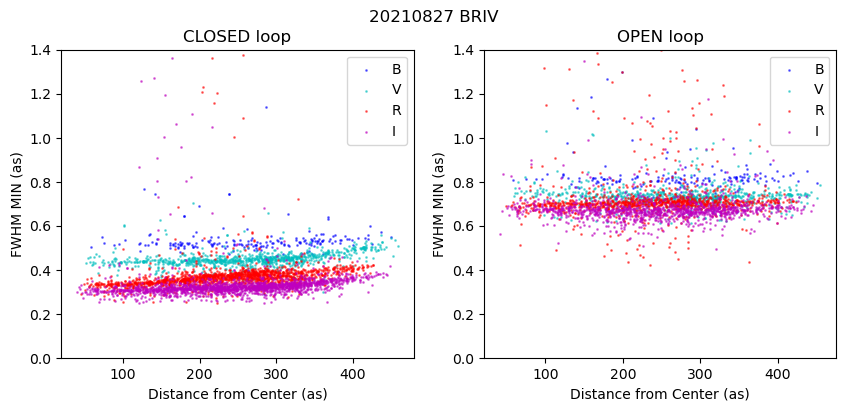

In [340]:
c_key = 'LS_c'
o_key = '_o'
odr ='BRIV'
width = 10560
dict_filt = {"B":"b", "V":"c", "R":"r", "I":"m"}

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,4))

for filt in dict_filt.keys():
    stats_stacked_c_mdp = f'{redu.stacks_dir}fld2_stack_{c_key}_{odr}_{filt}_{odr}_stars_stats_mdp.fits'
    stats_stacked_o_mdp = f'{redu.stacks_dir}fld2_stack_{o_key}_{odr}_{filt}_{odr}_stars_stats_mdp.fits'
    stats_c = Table.read(stats_stacked_c_mdp)
    stats_o = Table.read(stats_stacked_o_mdp)
    
    stats_c['Moffat FWHM'] = 2.0 * stats_c['Minor Alpha'] * np.sqrt((2.0**(1. / stats_c['Beta'])) - 1)
    stats_o['Moffat FWHM'] = 2.0 * stats_o['Minor Alpha'] * np.sqrt((2.0**(1. / stats_o['Beta'])) - 1)
    
    stats_c = stats_c[np.where((stats_c['Moffat FWHM']*stats_c.meta['SCALE'] > 0.25) & (stats_c['Beta'] > 0) & (stats_c['Minor Alpha'] > 0))[0]]
    stats_o = stats_o[np.where((stats_o['Moffat FWHM']*stats_o.meta['SCALE'] > 0.4) & (stats_o['Beta'] > 0) & (stats_o['Minor Alpha'] > 0))[0]]

    
    stats_c['FA'] = np.sqrt( (stats_c['xcentroid']-width/2)**2 + (stats_c['ycentroid']-width/2)**2 )*stats_c.meta['SCALE']
    stats_o['FA'] = np.sqrt( (stats_o['xcentroid']-width/2)**2 + (stats_o['ycentroid']-width/2)**2 )*stats_o.meta['SCALE']
    #FWHM_min, sig_FWHM_min, FWHM_maj, sig_FWHM_maj = moffat.calc_mof_fwhm(stats_stacked_c, filt=False, plate_scale=stats.meta['SCALE'])

    ax[0].scatter(stats_c['FA'], stats_c['Moffat FWHM']*stats_c.meta['SCALE'], c=dict_filt[filt], label = f'{filt}', alpha = 0.5, s = 1)
    ax[1].scatter(stats_o['FA'], stats_o['Moffat FWHM']*stats_o.meta['SCALE'], c=dict_filt[filt], label = f'{filt}', alpha = 0.5, s = 1)

ax[0].legend()
ax[1].legend()
ax[1].set_ylim(0, 1.4)    
ax[0].set_ylim(0, 1.4)

ax[0].set_xlabel(r'Distance from Center (as)')
ax[1].set_xlabel(r'Distance from Center (as)')

ax[0].set_ylabel(r'FWHM MIN (as)')
ax[1].set_ylabel(r'FWHM MIN (as)')

ax[0].set_title('CLOSED loop')
ax[1].set_title('OPEN loop')

plt.suptitle(f'{night} {odr} ')
plt.plot()
plt.savefig(f'../{night}_FWHM_seperation.png', dpi=300)

[]

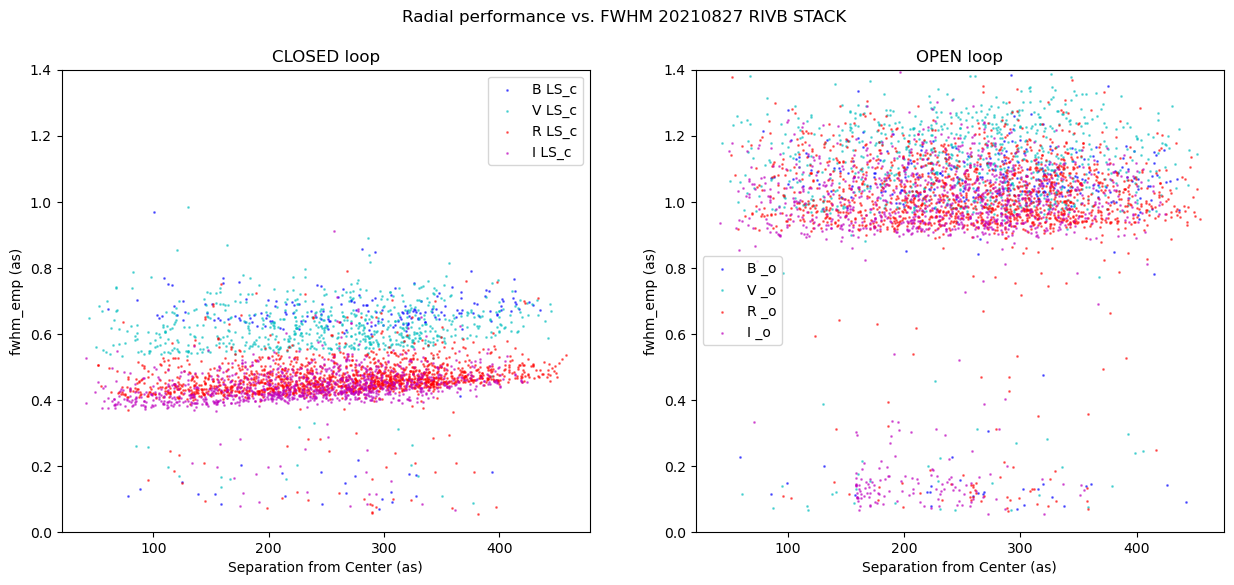

In [255]:
c_key = 'LS_c'
o_key = '_o'
odr ='RIVB'
width = 10560
dict_filt = {"B":"b", "V":"c", "R":"r", "I":"m"}

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,6))

for filt in dict_filt.keys():
    stats_stacked_c_mdp = f'{redu.stacks_dir}fld2_stack_{c_key}_{odr}_{filt}_{odr}_stars_stats_mdp.fits'
    stats_stacked_o_mdp = f'{redu.stacks_dir}fld2_stack_{o_key}_{odr}_{filt}_{odr}_stars_stats.fits'
    stats_c = Table.read(stats_stacked_c_mdp)
    stats_o = Table.read(stats_stacked_o_mdp)

    stats_c['FA'] = np.sqrt( (stats_c['xcentroid']-width/2)**2 + (stats_c['ycentroid']-width/2)**2 )*stats_c.meta['SCALE']
    stats_o['FA'] = np.sqrt( (stats_o['xcentroid']-width/2)**2 + (stats_o['ycentroid']-width/2)**2 )*stats_o.meta['SCALE']
    #FWHM_min, sig_FWHM_min, FWHM_maj, sig_FWHM_maj = moffat.calc_mof_fwhm(stats_stacked_c, filt=False, plate_scale=stats.meta['SCALE'])

    ax[0].scatter(stats_c['FA'], stats_c['fwhm_emp']*stats_c.meta['SCALE'], c=dict_filt[filt], label = f'{filt} {c_key}', alpha = 0.5, s = 1)
    ax[1].scatter(stats_o['FA'], stats_o['fwhm_emp']*stats_o.meta['SCALE'], c=dict_filt[filt], label = f'{filt} {o_key}', alpha = 0.5, s = 1)

ax[0].legend()
ax[1].legend()

ax[1].set_ylim(0, 1.4)    
ax[0].set_ylim(0, 1.4)

ax[0].set_xlabel(r'Separation from Center (as)')
ax[1].set_xlabel(r'Separation from Center (as)')

ax[0].set_ylabel(r'fwhm_emp (as)')
ax[1].set_ylabel(r'fwhm_emp (as)')

ax[0].set_title('CLOSED loop')
ax[1].set_title('OPEN loop')

plt.suptitle(f'Radial performance vs. FWHM {night} {odr} STACK')
plt.plot()

In [232]:
Table.read(stats_stacked_c_mdp)

<Table length=212>
  id  xcentroid ycentroid ...     Minor Alpha         Major Alpha    
int64  float64   float64  ...       float64             float64      
----- --------- --------- ... -------------------- ------------------
10909   743.671  5378.247 ...   -5.741635365825249 22.609930808308846
10941   669.285    5384.2 ...   0.5556593074580989 2.0944722918617686
10968   439.888  5391.351 ...   1.5490200518206052 2.1803105199509503
10983  1029.495  5391.795 ...    1.738612940179788  3.728793712038325
11050   475.592   5404.23 ...  -0.2065421099969768 1.0002560463822188
11064    918.98  5404.447 ...   3.7248213359809488  7.228348818795811
11070   404.725  5406.623 ...   -2.047007151506359 2.1465683217648923
11136  1618.723  5416.335 ...   -3.279337585168398  2.813849720076411
11197  2127.933  5430.573 ...   16.389664760707202 26.292211899769995
11260  2395.685  5449.663 ... -0.33291551651699247 0.6454197597077074
  ...       ...       ... ...                  ...                ...
15998   628.855 10046.089 ...    5.198122142094712   9.04184681585758
16005  2583.845 10067.977 ...    7.009966387562702  8.313680179622523
16027  2421.813 10109.575 ...    6.561941651908512   7.79553598869832
16029  1181.233 10112.035 ...   7.4919760288314405   8.47815443257847
16044  1636.914 10174.186 ...    7.239460142820939  8.439314974350623
16048  3094.058 10177.413 ...    7.035049992981955  8.256528328735708
16058  3499.921 10210.562 ...   7.1896806409875635  8.738619952130069
16097  2688.405 10316.628 ...    6.971519529473408   8.17878655620783
16099   223.861 10327.088 ...    9.555152798233594 10.729534383857999
16106  2966.391 10347.631 ...   7.1995019977704375   8.69882933782234

In [178]:
stats_stacked_mdp_f = redu.stats_dir + 'stats_stacks_mdp.fits'
stats_stacked_mdp = Table.read(redu.stats_dir + 'stats_stacks_mdp.fits')
stats_stacked_mdp

<Table masked=True length=6>
                                    Image                                      ...
                                   bytes78                                     ...
------------------------------------------------------------------------------ ...
     /g/lu/data/imaka/onaga/20210827/sta/reduce/stacks/fld2_stack__o_BRIV.fits ...
   /g/lu/data/imaka/onaga/20210827/sta/reduce/stacks/fld2_stack_LS_c_BRIV.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/stacks/fld2_stack_docz2_c_BRIV.fits ...
     /g/lu/data/imaka/onaga/20210827/sta/reduce/stacks/fld2_stack__o_RIVB.fits ...
   /g/lu/data/imaka/onaga/20210827/sta/reduce/stacks/fld2_stack_LS_c_RIVB.fits ...
/g/lu/data/imaka/onaga/20210827/sta/reduce/stacks/fld2_stack_docz2_c_RIVB.fits ...

In [191]:
stack_ex_f = redu.stacks_dir +'fld2_stack__o_RIVB_I_RIVB_stars_stats_mdp.fits'
stack_ex = Table.read(stack_ex_f)

In [192]:
FWHM_min, sig_FWHM_min, FWHM_maj, sig_FWHM_maj = moffat.calc_mof_fwhm(stats_file, filt=False, plate_scale=scale_tmp)

<Table length=860>
  id  xcentroid ycentroid ...    Minor Alpha        Major Alpha    
int64  float64   float64  ...      float64            float64      
----- --------- --------- ... ------------------ ------------------
 2747  7797.743  5342.585 ... 3.3234018113781043  9.726565057179503
 2751  7797.694  5368.161 ...  1.003902776082087 2.6827441221285686
 2752  7798.488  5384.191 ...  2.045592936862211  6.417142849521155
 2753  7797.004  5403.715 ...  1.255603457166161 10.034307685464206
 2755  7797.346  5432.566 ...  0.457289710401133   5.89454333911232
 2761  7796.482  5455.504 ... 0.2812331313710036 16.634858836030908
 2762  8492.619  5467.888 ... 14.071199328575856 20.412812677351003
 2764  7797.103  5472.959 ...  0.550058936824206   8.51951167663919
 2765  8418.619  5470.817 ... 17.978373671053447 25.198157314324124
 2766  8710.281  5473.851 ... 27.745728890358084  40.30267035271996
  ...       ...       ... ...                ...                ...
 6771  6420.232  9841.227 ...  14.55340019343819  19.95715992870141
 6777  6485.971  9852.039 ...  6.492381954223671 12.147527165660675
 6818  6390.158   9920.02 ... 18.407431675718243   26.3301034333574
 6821  6669.988  9921.951 ...  16.26120605569297 22.880158098934274
 6846  7212.067  9976.865 ... 16.190496229243255  22.55045987531288
 6850  7419.666  9979.327 ... 17.018040552628175   23.9795135449683
 6866  7303.739 10002.273 ... 14.821488416421829 20.523453968433852
 6899  7386.941  10065.73 ... 16.350349660056956 21.117859562066787
 6959  7414.043 10155.104 ... 24.365751016041422 34.366965975035505
 6985   7361.91 10196.964 ... 25.036620979711177 36.518270761398554

## 1.2. Plot: Stats Stacking

This plots various stats wrt frame number. Edits have been made to show 4F data more intelligently.

List of plots shown:

In [ ]:
def plot_stack_stats(date, suffixes=['open', 'ttf', 'closed'], root_dir='/Users/jlu/work/imaka/pleiades/', reduce_dir='fli/reduce/'):
    """
        Make a suite of standard plots for the stats on a given night.
        Parameters
        ----------
        date : str
        The date string for which to plot up the stats (i.e. '20170113').
        Optional Parameters
        -------------------
        suffix : str
        stats files have the name stats_open<suffix>.fits, stats_ttf<suffix>.fits, and
        stats_closed<suffix>.fits.
        root_dir : str
        The root directory for the <date> observing run directories. The
        stats files will be searched for in:
        <root_dir>/<date>/fli/reduce/stats/
        """
    stats_dir = root_dir + date + '/' + reduce_dir + 'stats/'
    plots_dir = root_dir + date + '/' + reduce_dir + 'plots/'
    
    util.mkdir(plots_dir)
    
    dict_filt = {"B":"b", "V":"c", "R":"r", "I":"m"}
    
    stats = []
    for suffix in suffixes:
        stats.append(Table.read(stats_dir + 'stats_' + suffix + '.fits'))
    
    scale = stats[0].meta['SCALE']
    colors = get_color_list()
    
    #
    # Plots for ratio of improvements. First we need to find a matching
    # closed loop image to go with each open (and TTF) image.
    #
    tree_indices = []
    tree_so = scipy.spatial.KDTree(np.array([stats[0]['Index']]).T)
    for ss in range(len(suffixes)):
        dist_ss, idx_ss = tree_so.query(np.array([stats[ss]['Index']]).T, 1)
        tree_indices.append(idx_ss)
    
    #####
    # FWHM vs. Frame
    #####
    plt.figure(1, figsize=(12, 6))
    plt.subplots_adjust(left=0.1, bottom=0.15)
    plt.clf()
    plt.subplot(121)
    for ss in range(len(suffixes)):
        plt.plot(stats[ss]['Index'], stats[ss]['FWHM']*scale, marker='o', linestyle='none', label=suffixes[ss])
    plt.xlabel('Frame Number')
    plt.ylabel('Gaussian-Fit FWHM (")')
    plt.legend(numpoints=1)
    plt.ylim(0, 1.5)
    plt.title(date)

    plt.subplot(122)
    for ss in range(1, len(suffixes)):
        idx = tree_indices[ss]
        label = suffixes[ss] + " / " + suffixes[0]
        plt.plot(stats[0]['Index'][idx], stats[ss]['FWHM'] / stats[0]['FWHM'][idx], marker='o', c=dict_filt[filt], linestyle='none', label=label)
    plt.xlabel('Frame Number')
    plt.ylabel('Ratio of Gaussian-Fit FWHM')
    plt.legend(numpoints=1)
    plt.axhline(1.0, color='k', linestyle='--', linewidth=2)
    plt.ylim(0, 1.3)
    plt.savefig(plots_dir + 'fwhm_vs_frame' + suffix + '.png')

In [67]:
stats = Table.read(root_dir + 'reduce/stats/stats_docz_IVBR_mdp.fits')
print(stats.colnames)
# Not 100% sure which one is FWHM for moffat fit

['Image', 'FILTER', 'BINFAC', 'DATE_UTC', 'TIME_UTC', 'DATE_HST', 'TIME_HST', 'FWHM', 'FWHM_std', 'EE25', 'EE50', 'EE80', 'NEA', 'NEA2', 'xFWHM', 'yFWHM', 'theta', 'emp_fwhm', 'emp_fwhm_std', 'quadrant', 'Index', 'N Stars', 'N Sky', 'N Sky std', 'Amplitude', 'Amplitude std', 'Phi', 'Phi std', 'Beta', 'Beta std', 'Minor Alpha', 'Minor Alpha std', 'Major Alpha', 'Major Alpha std', 'DIMM', 'DIMM_dt_hr', 'MASS', 'MASS_dt_hr', 'Cn2dh_005', 'Cn2dh_010', 'Cn2dh_020', 'Cn2dh_040', 'Cn2dh_080', 'Cn2dh_160', 'Cn2dh_dt_hr']


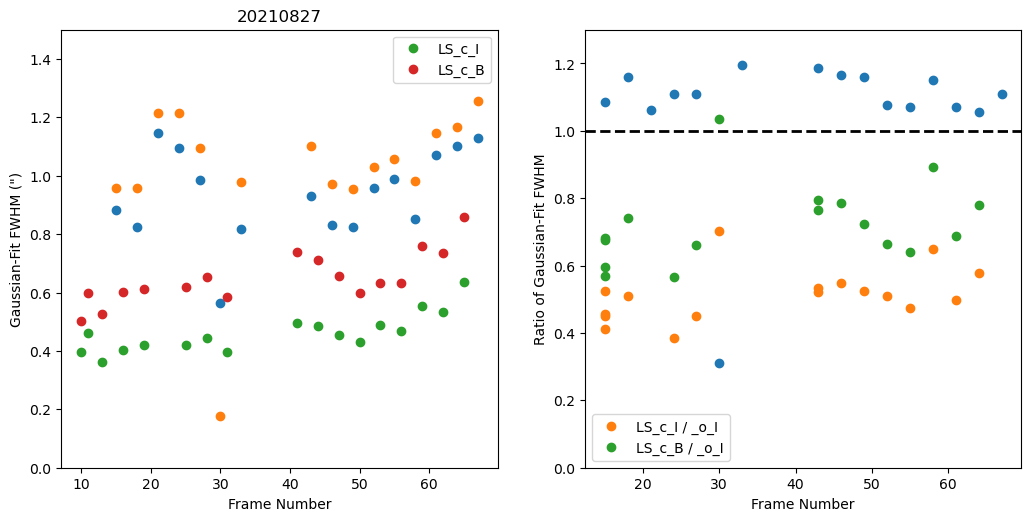

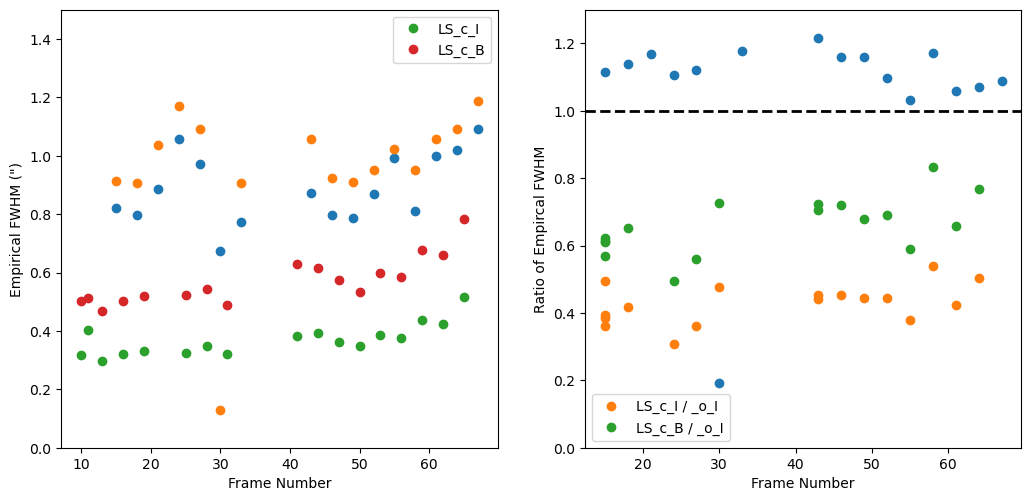

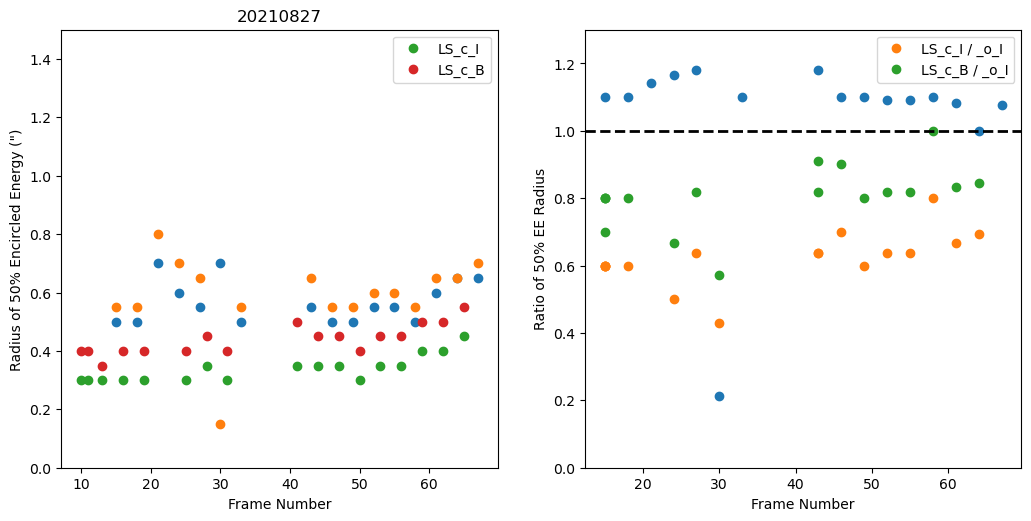

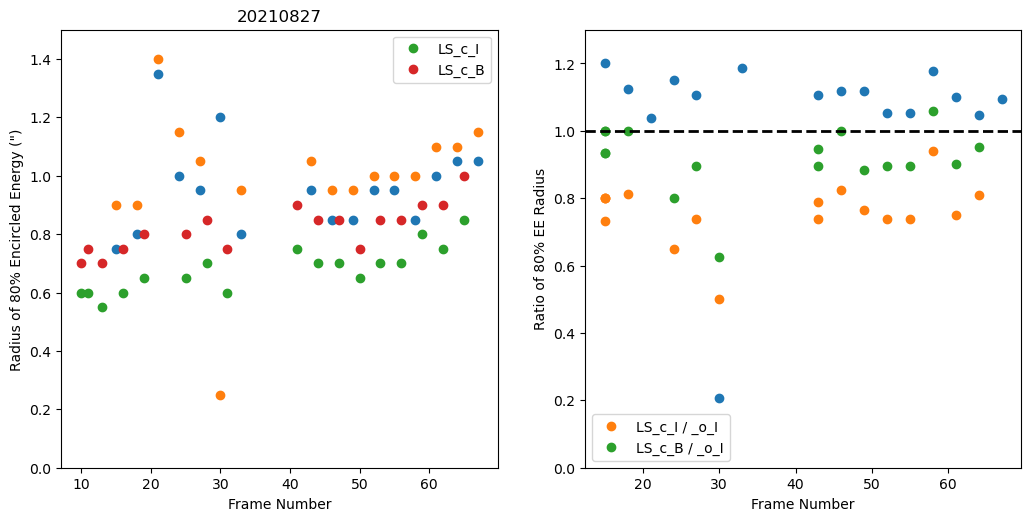

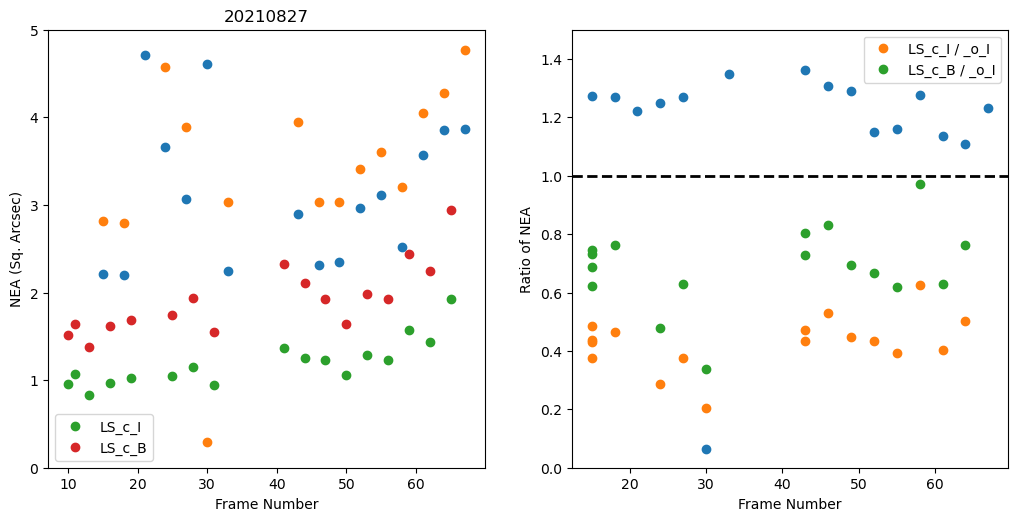

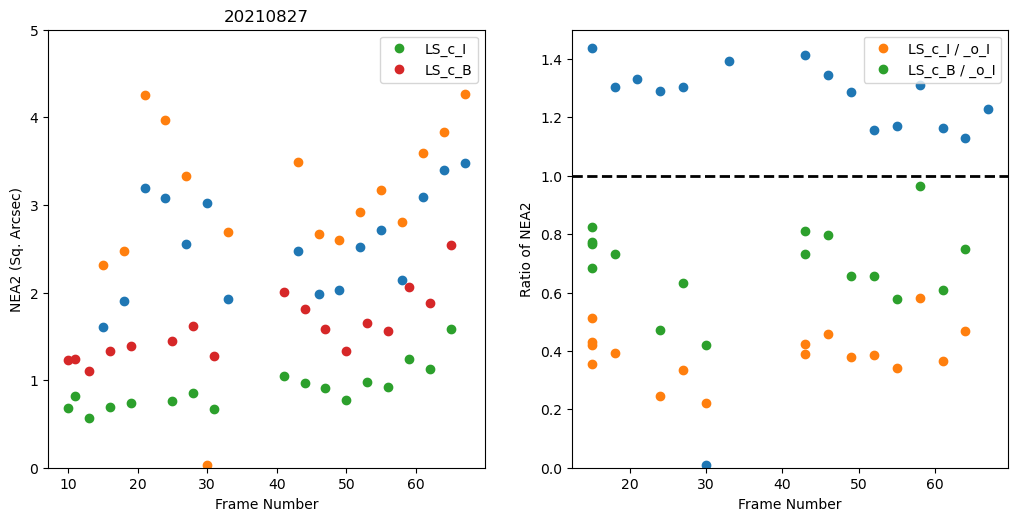

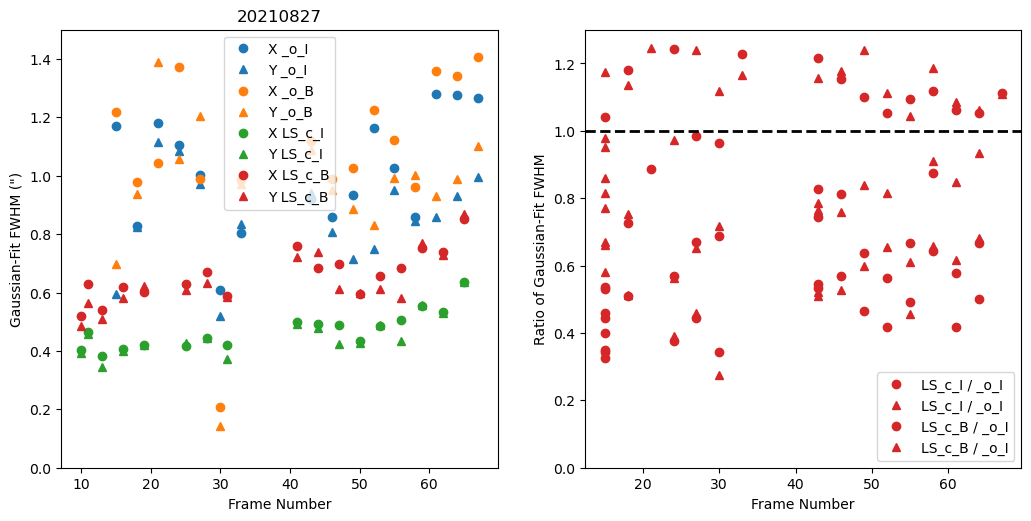

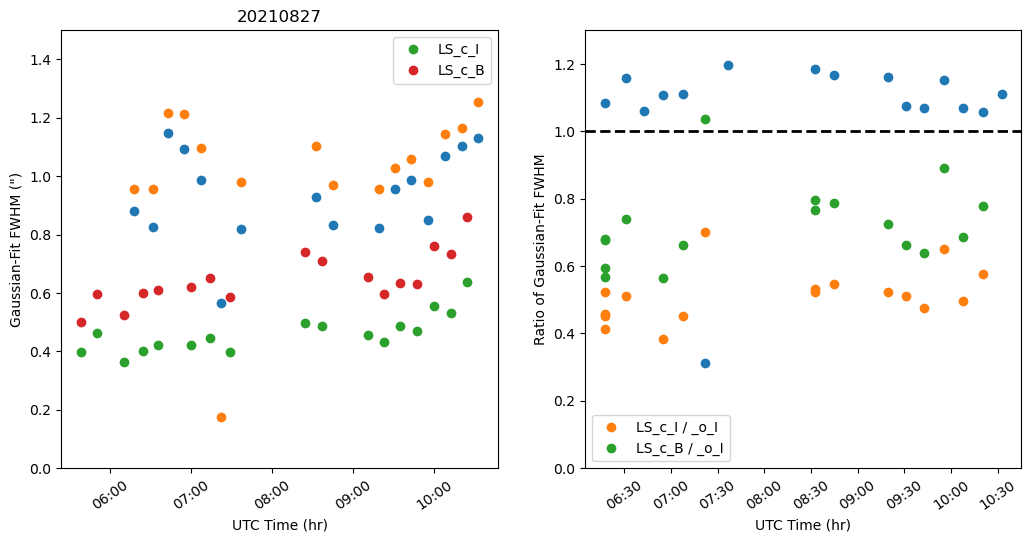

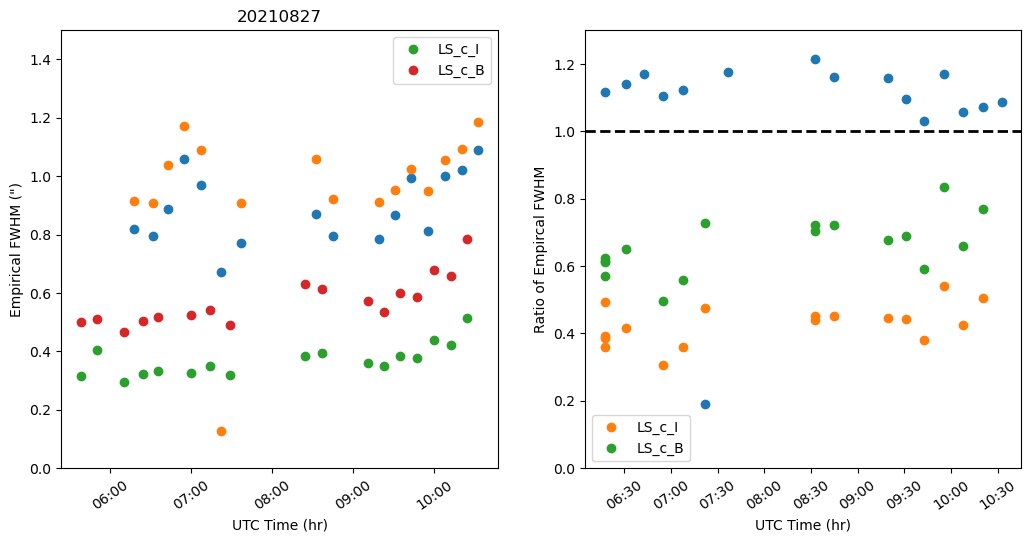

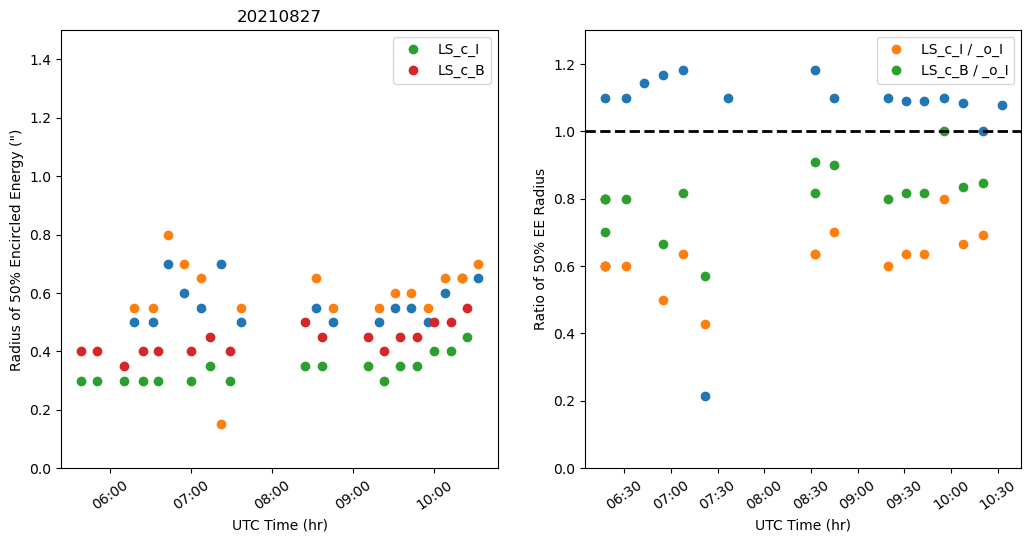

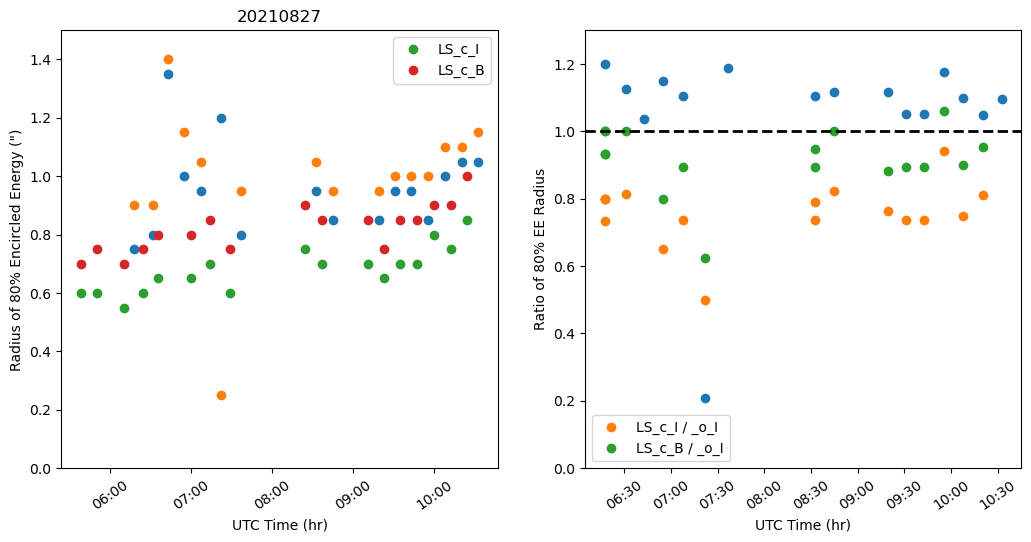

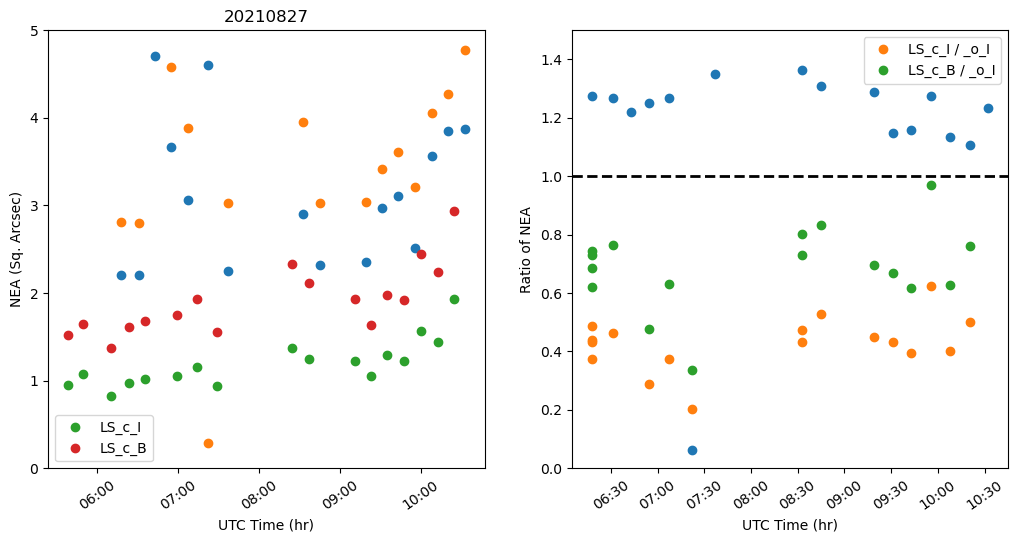

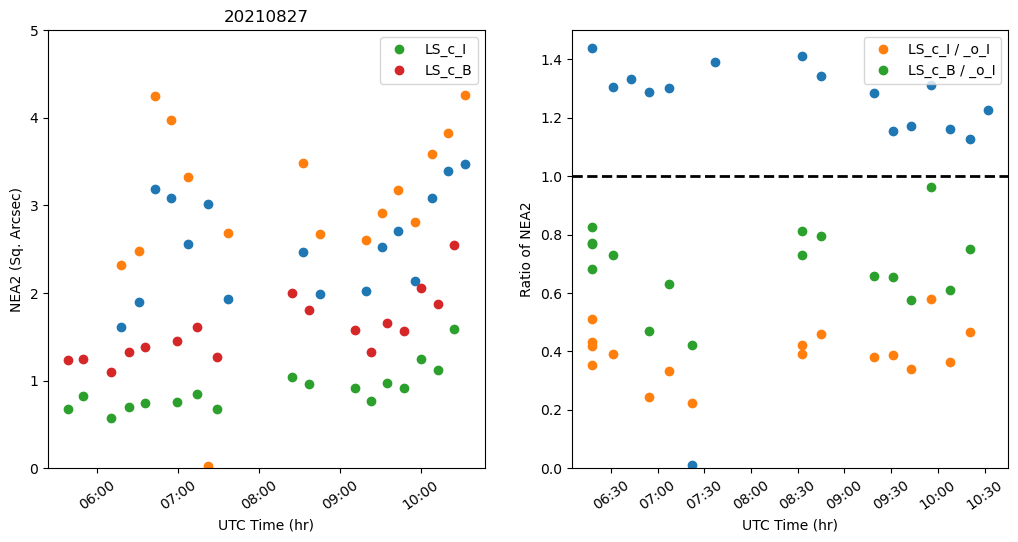

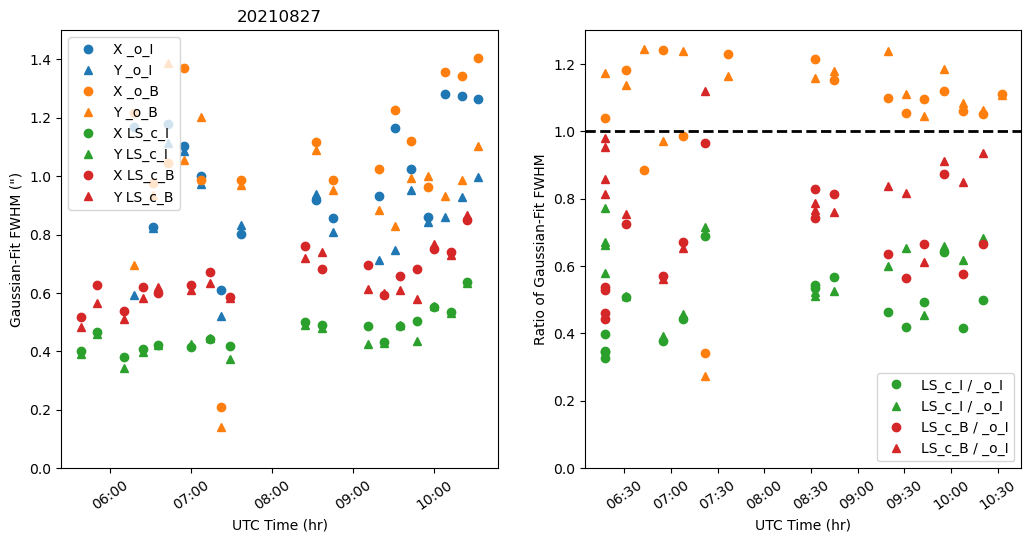

In [343]:
## Must have completed stats
suffixes = list(redu.dict_suffix.keys())
suffixes = ['_o_I', '_o_B', 'LS_c_I', 'LS_c_B']
plot_stats.plot_stack_stats(night, suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')
plt.show()

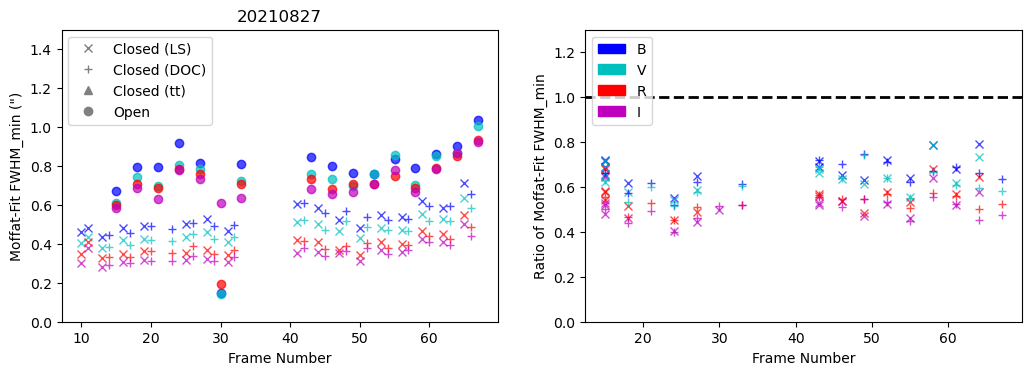

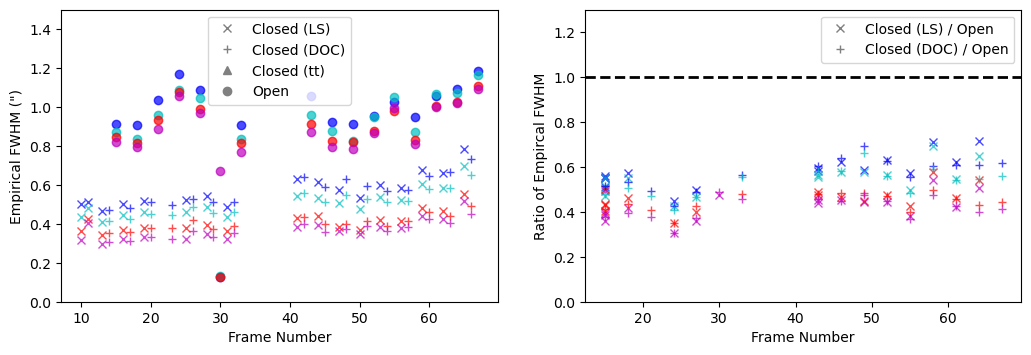

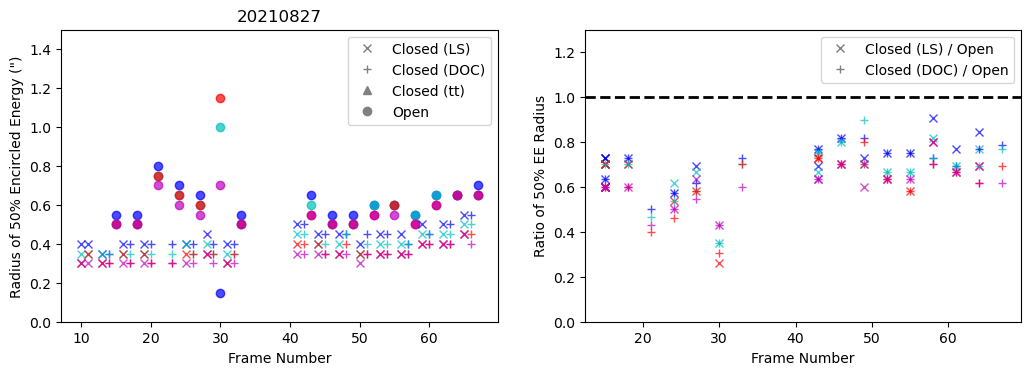

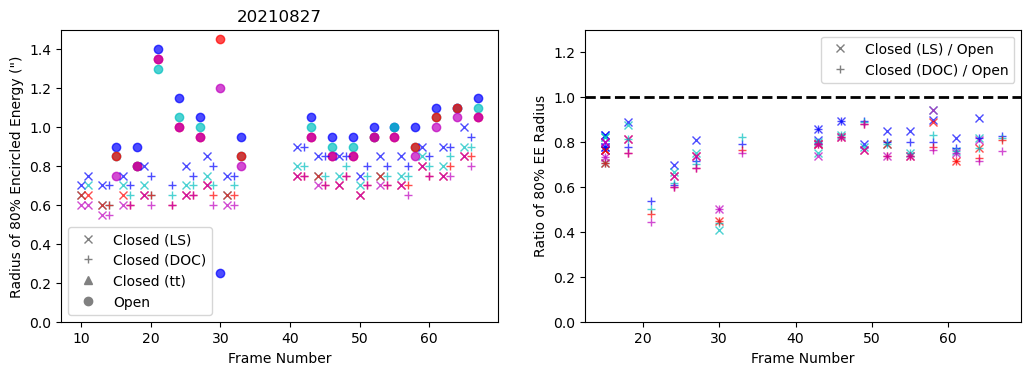

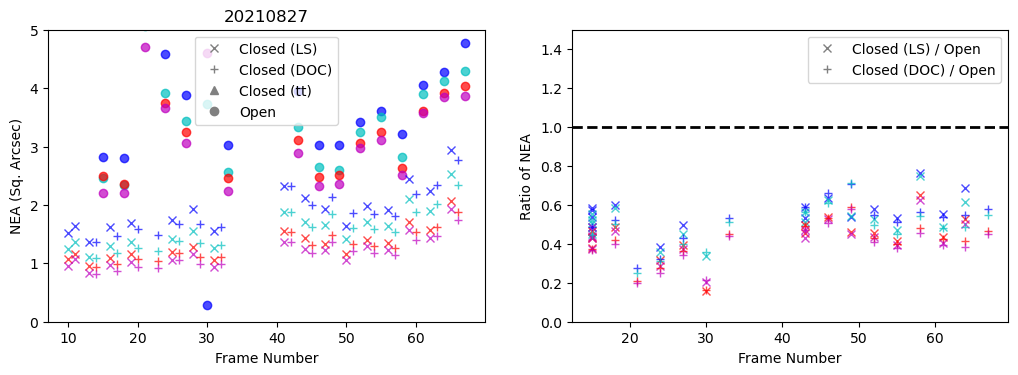

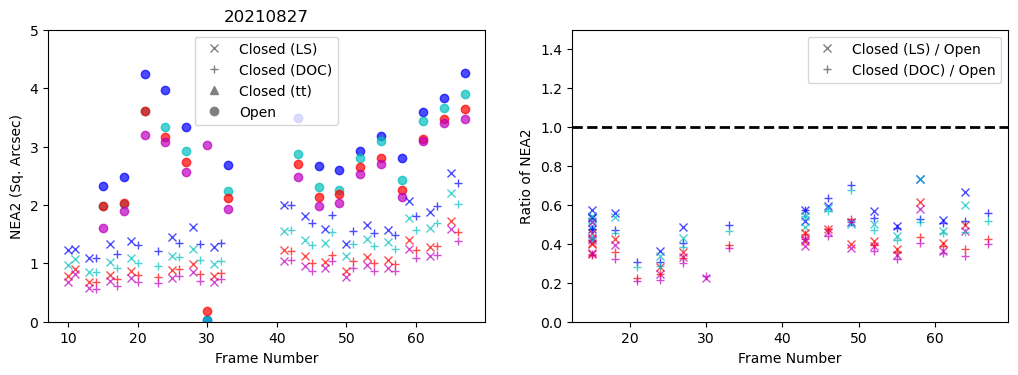

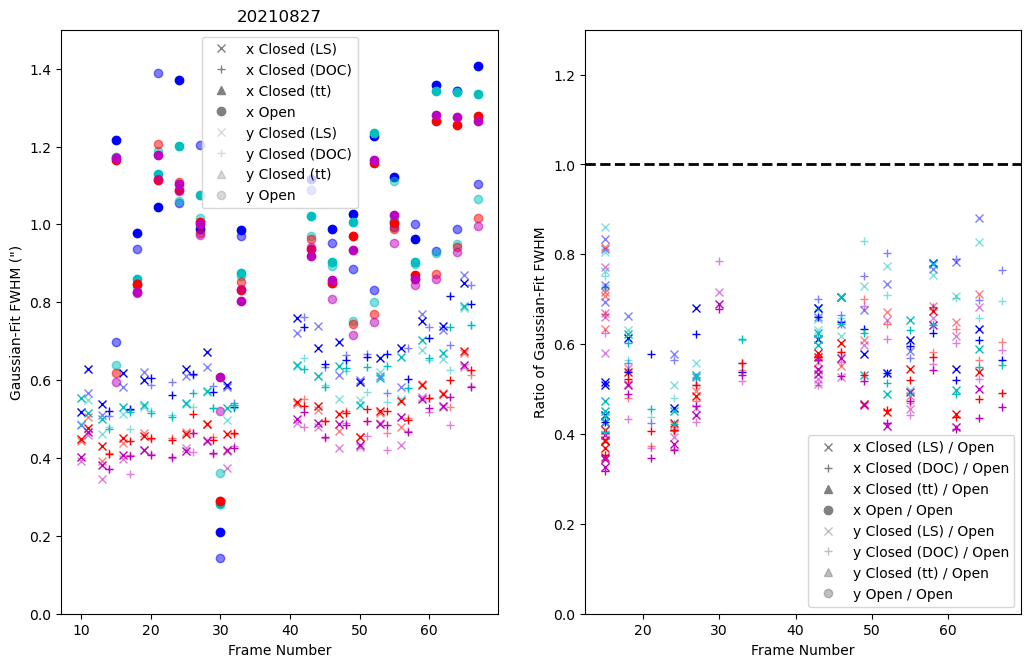

In [368]:
reload(plot_redu)
suffixes = ['_o', 'LS_c', 'docz2_c']
plot_redu.plot_stack_stats_4F_frame(night, suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')
plt.show()

# 2. Aggregate Plots

## 2.1. Plot: Time Variation w/MASS-DIMM

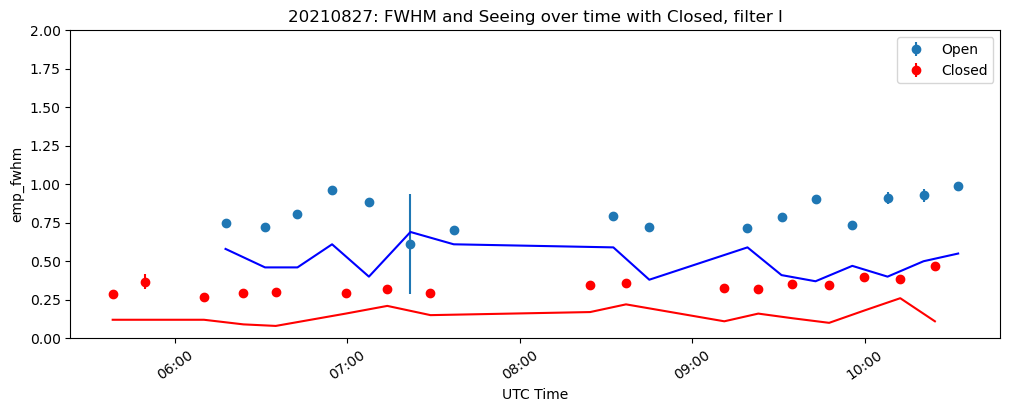

In [114]:
filt = "I"
wav = 806

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

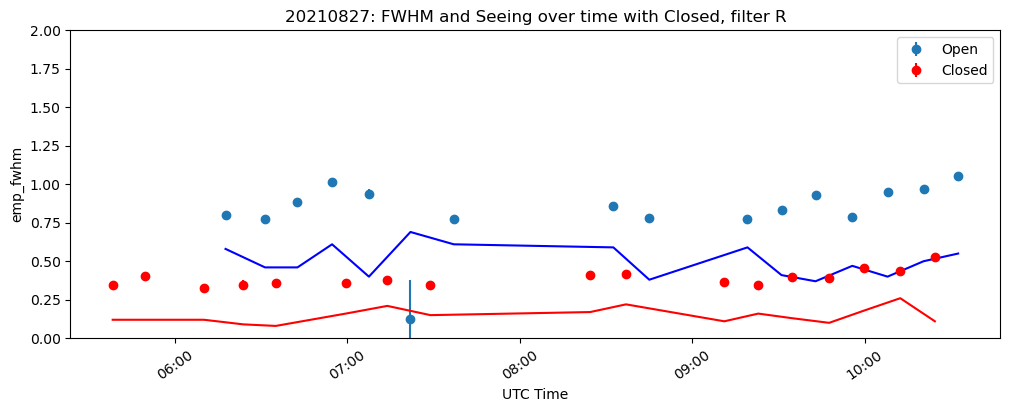

In [115]:
filt = "R"
wav = 658

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

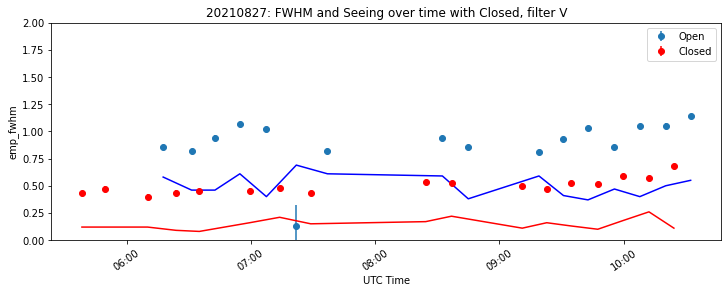

In [109]:
filt = "V"
wav = 551

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

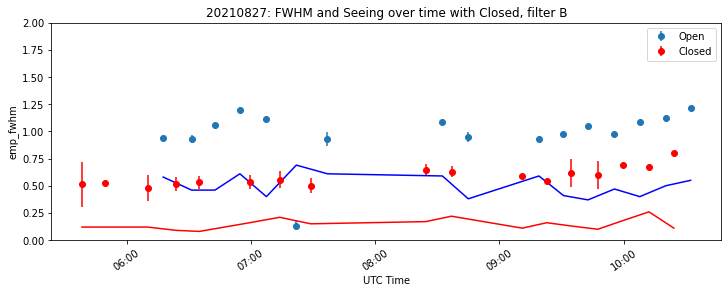

In [107]:
filt = "B"
wav = 445

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

In [69]:
list(redu.dict_suffix.keys())

['open_BRIV', 'LS_BRIV', 'docz_BRIV', 'open_RIVB', 'LS_RIVB', 'docz_RIVB']

## 2.2. Plot: CDF of Moffat FWHM

This fuction takes in files, and for each, calculates a FWHM. The minor and major axises are then plotted.

Plate scale is not hard-coded or mentioned... not sure why this pixel scale is off yet [TODO]

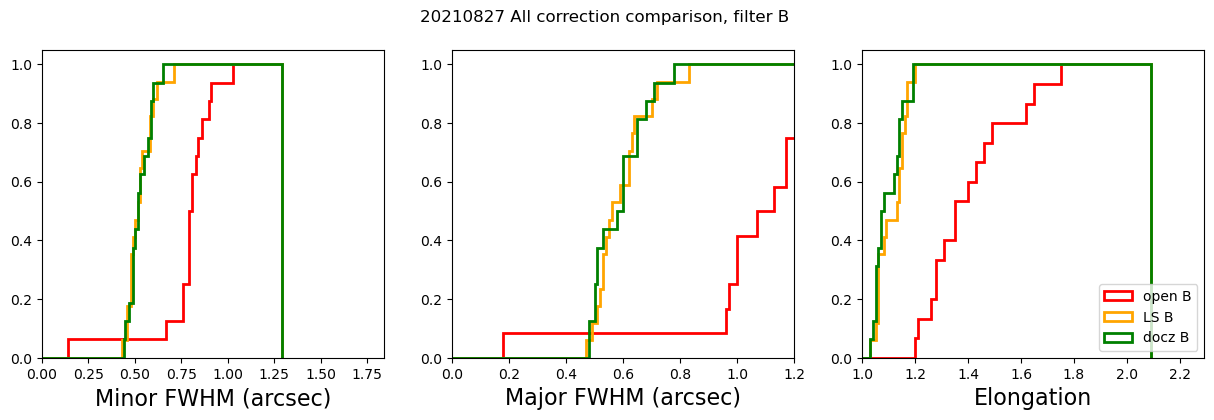

In [120]:
f_band = "B"

files = [f"{stats_dir}stats__o_{f_band}_mdp.fits", f"{stats_dir}stats_LS_c_{f_band}_mdp.fits", f"{stats_dir}stats_docz2_c_{f_band}_mdp.fits"]
labels = ['open '+ f_band, 'LS ' + f_band, 'docz ' + f_band]
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All correction comparison, filter {f_band}")
plt.show()

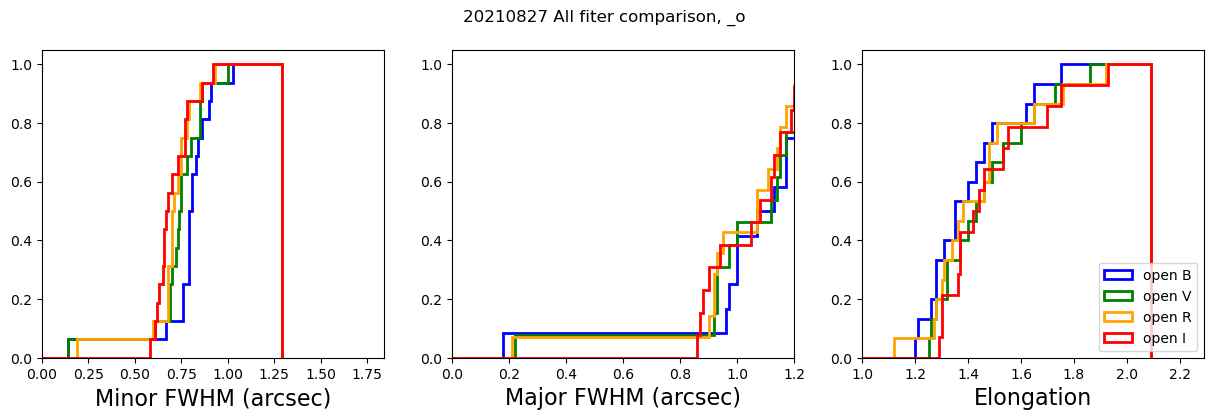

In [121]:
suff = "_o"

files = [f"{stats_dir}stats_{suff}_B_mdp.fits", f"{stats_dir}stats_{suff}_V_mdp.fits", f"{stats_dir}stats_{suff}_R_mdp.fits",f"{stats_dir}stats_{suff}_I_mdp.fits"]
labels = ['open B', 'open V', 'open R', 'open I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

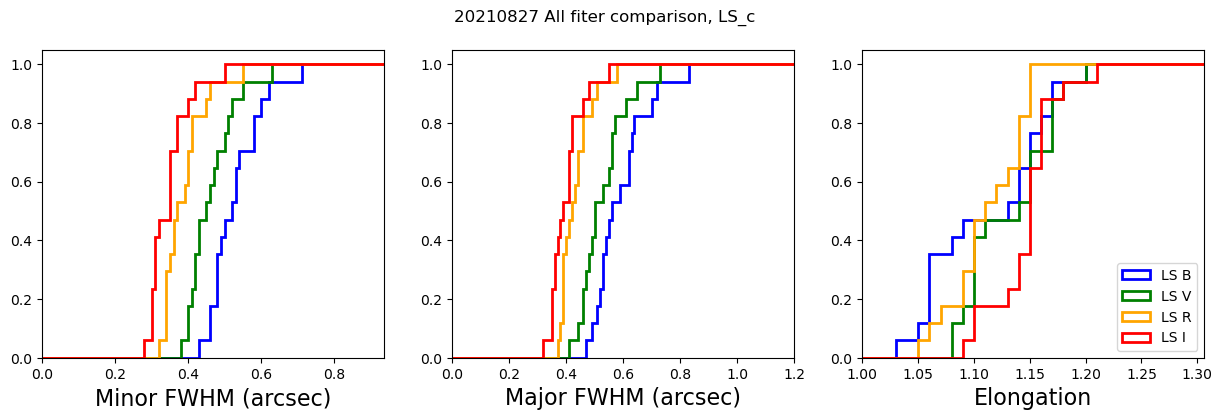

In [122]:
suff = "LS_c"

files = [f"{stats_dir}stats_{suff}_B_mdp.fits", f"{stats_dir}stats_{suff}_V_mdp.fits", f"{stats_dir}stats_{suff}_R_mdp.fits",f"{stats_dir}stats_{suff}_I_mdp.fits"]
labels = ['LS B', 'LS V', 'LS R', 'LS I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

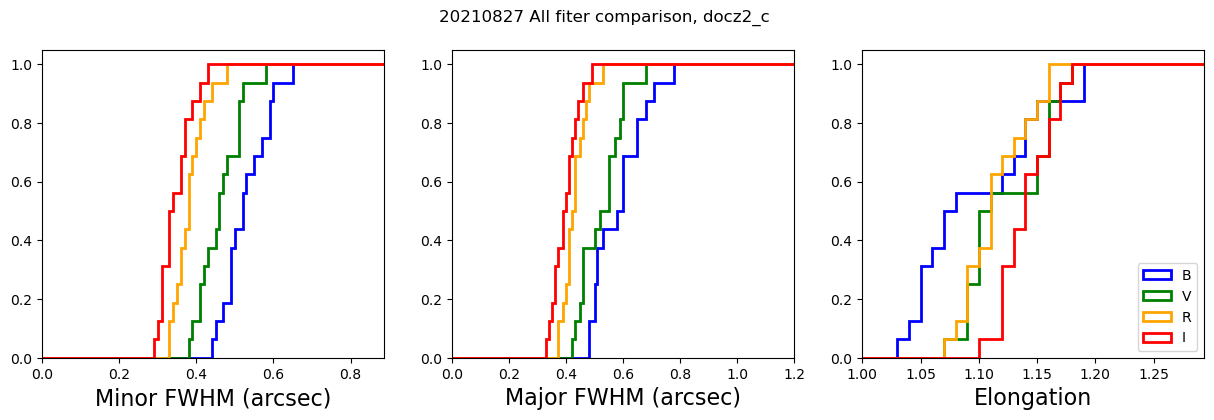

In [124]:
suff = "docz2_c"

files = [f"{stats_dir}stats_{suff}_B_mdp.fits", f"{stats_dir}stats_{suff}_V_mdp.fits", f"{stats_dir}stats_{suff}_R_mdp.fits",f"{stats_dir}stats_{suff}_I_mdp.fits"]
labels = ['B', 'V', 'R', 'I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

# 3. Four Filter Analysis Plots

In [128]:
from imaka.analysis import fourfilt
root = stats_dir

files_c = [root+"stats_LS_c_B.fits", root+"stats_LS_c_V.fits", root+"stats_LS_c_R.fits", root+"stats_LS_c_I.fits"]
files_o = [root+"stats__o_B.fits", root+"stats__o_V.fits", root+"stats__o_R.fits", root+"stats__o_I.fits"]
wav = [445, 551, 658, 806]
fourfilt.stack_all(table_list, open_close_list, filter_list)
# not 100% sure how to use this one...

NameError: name 'table_list' is not defined

## 3.1. Plot: 4F Correction Factor

Near-simeltaneous AO-off and AO-on data in each filter shows the variation in amount of correction with changing wavelength. 

What is plotted? Median FWHM \* ps for the listed files. Done for moffat FWHM. The original Function in fourfilt.py seems to be recomputing the moffat FWHM...
- Left: Performance for AO-off (blue) and AO-on (red), showing minor FWHM (circles) and major FWHM (squares) at each observation band.
- Right: Ratio of AO-off to AO-on FWHM for each filter, shown both for minor (circles) and major (squares) axes.

Plate scale (ps) was originally hard coded to 0.12





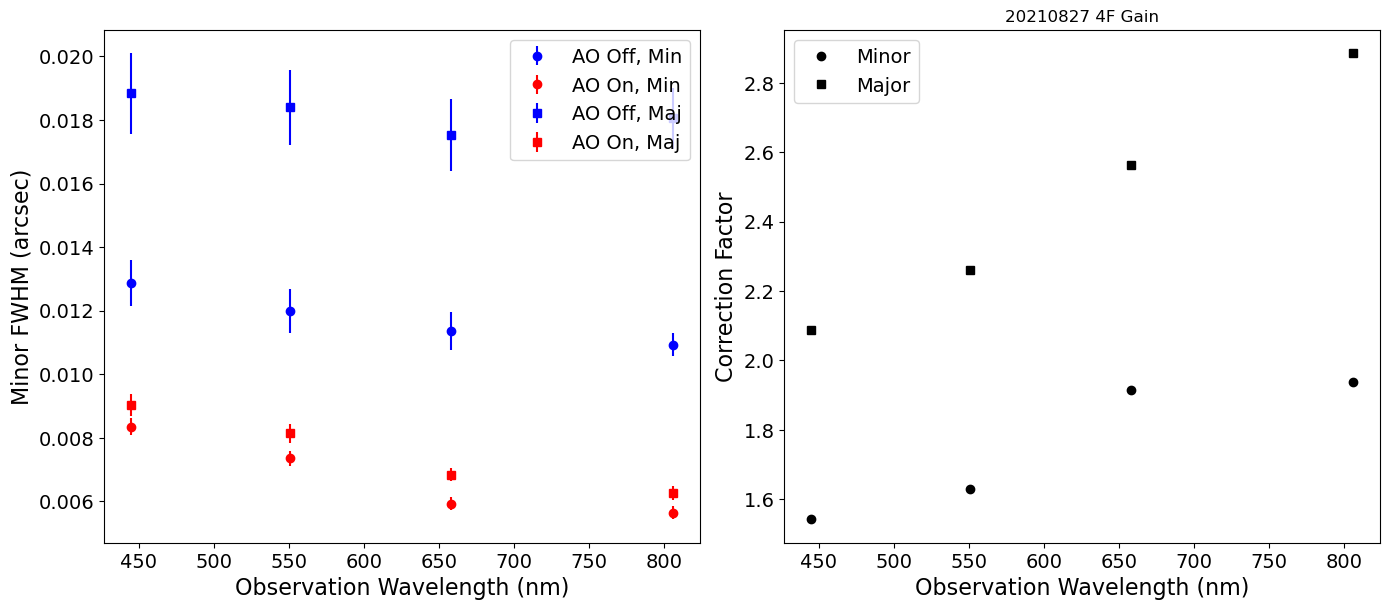

In [129]:
reload(fourfilt)
fourfilt.plot_gain(files_o, files_c, ps = 0.063) 
plt.title(f"{night} 4F Gain")
plt.show()

## 3.2. Plot: 4F Dependence Model
(Copied from four filter Analysis.ipynb)

GLAO correction is expected to be a function of wavelength. The figure below shows median minor FWHM at variuos wavelengths for AO-off (blue) and AO-on (red) data.  The data have been fit to a power-law model of the form: $f(x)=A(\frac{x}{x_o})^{-\alpha}$

With $A$, $x_o$, and $\alpha$ as free parameters

Each data set is shown in circle points with errorbars, with the best fit model (weighted with uncertainties) in solid lines. The corresponding $\alpha$ and $\chi^2$ are shown in the same color as the matching data set. In this case, the chi squared is the same as the reduced chi squared (4 data points - 3 free parameters = 1 degree of freedom).


χ$^2$=0.09
χ$^2$=4.5
α=0.27
α=0.72


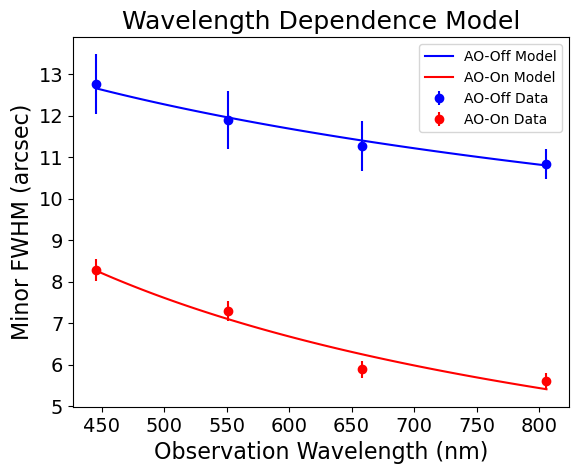

In [139]:
reload(fourfilt)
fourfilt.power_model(files_o, files_c, ps=1.0)

In [ ]:
# alpha and beta as a function of wavelength

# Field Variability

In [19]:
from importlib import reload
reload(plot_stats)

<module 'imaka.analysis.plot_stats' from '/u/eden/code/imaka/imaka/analysis/plot_stats.py'>

### Closed loop, single exposure

sta019LS_c_scan
Median FWHM           = 0.348"
Median FWHM (clipped) = 0.347"
Mean FWHM             = 0.425"
Mean FWHM (clipped)   = 0.356"
Stddev FWHM           = 2.471"
Stddev FWHM (clipped) = 0.054"


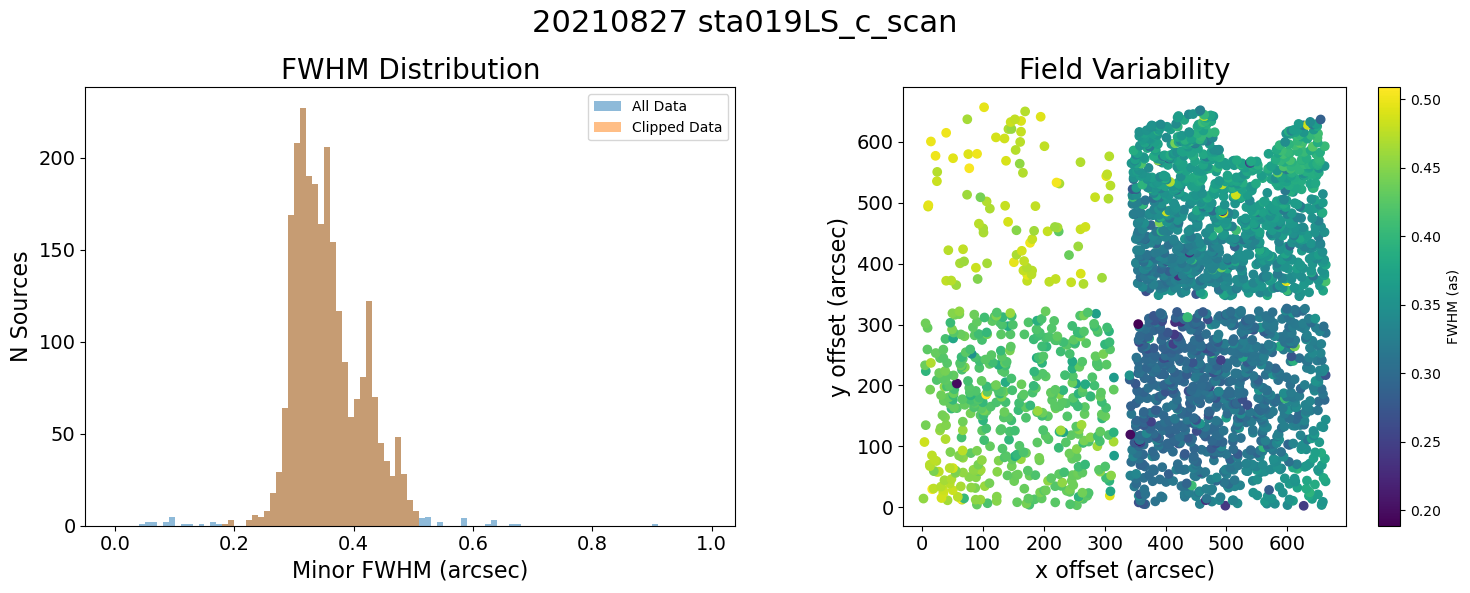

In [106]:
test_img_base = "sta019LS_c_scan"
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, night +" "+ test_img_base )

sta050LS_c_scan
Median FWHM           = 0.345"
Median FWHM (clipped) = 0.345"
Mean FWHM             = 0.397"
Mean FWHM (clipped)   = 0.355"
Stddev FWHM           = 0.894"
Stddev FWHM (clipped) = 0.051"


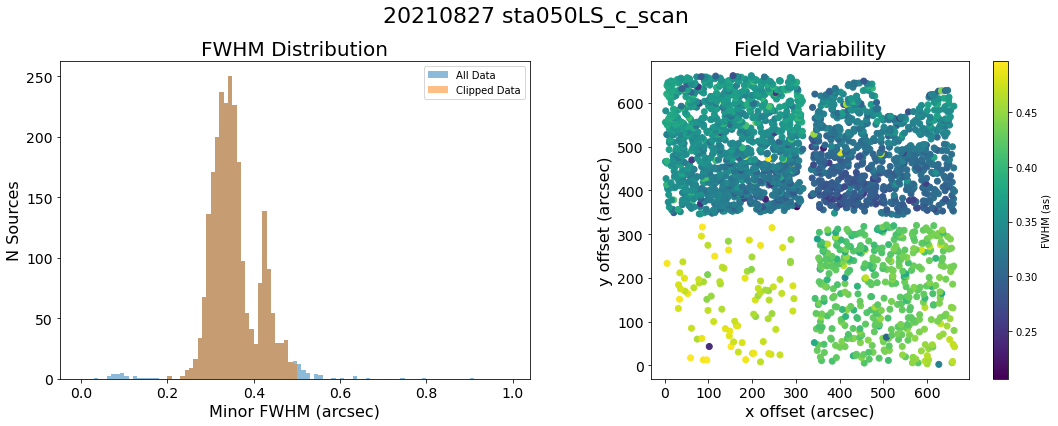

In [14]:
test_img_base = "sta050LS_c_scan"
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, night +" "+ test_img_base)

### Open Loop

Median FWHM           = 0.698"
Median FWHM (clipped) = 0.698"
Mean FWHM             = 0.770"
Mean FWHM (clipped)   = 0.702"
Stddev FWHM           = 1.564"
Stddev FWHM (clipped) = 0.049"


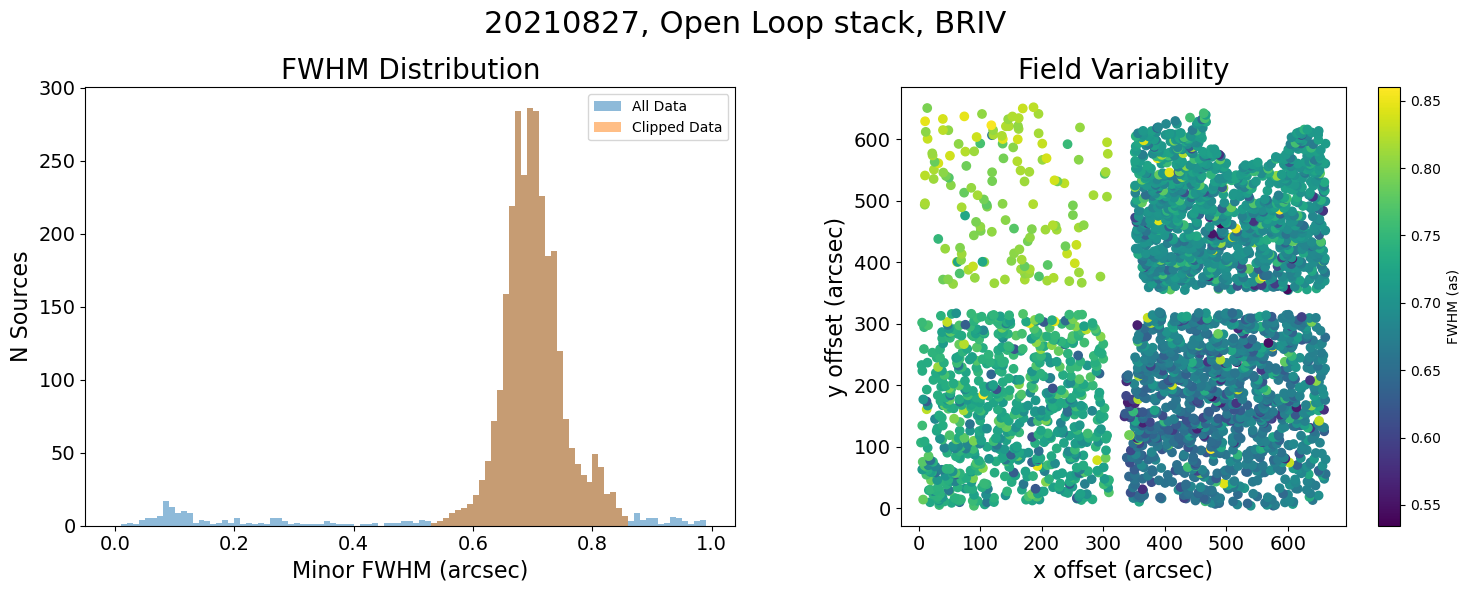

In [107]:
filt = 'BRIV'
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop stack, {filt}")

Median FWHM           = 0.768"
Median FWHM (clipped) = 0.768"
Mean FWHM             = 0.768"
Mean FWHM (clipped)   = 0.769"
Stddev FWHM           = 0.217"
Stddev FWHM (clipped) = 0.045"


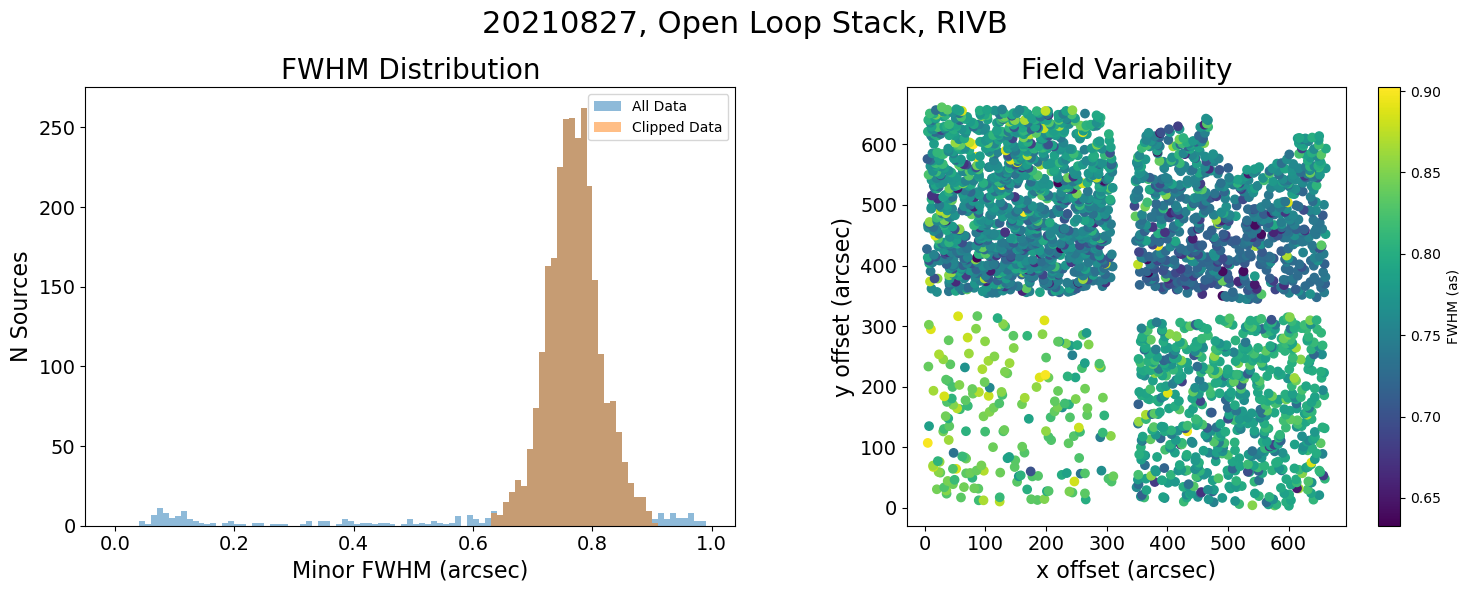

In [108]:
filt = 'RIVB'
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop Stack, {filt}")

### Closed (LS)

Median FWHM           = 0.355"
Median FWHM (clipped) = 0.353"
Mean FWHM             = 0.513"
Mean FWHM (clipped)   = 0.366"
Stddev FWHM           = 0.975"
Stddev FWHM (clipped) = 0.065"


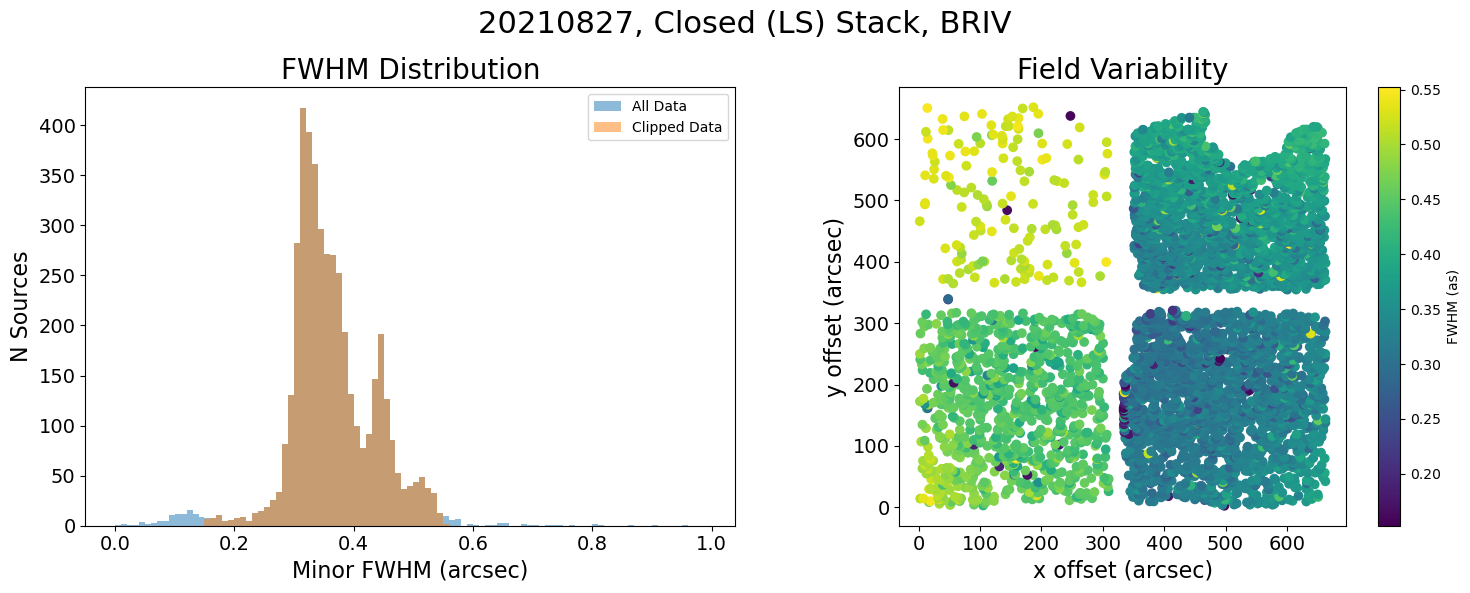

In [109]:
filt = 'BRIV'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (LS) Stack, {filt}")

Median FWHM           = 0.407"
Median FWHM (clipped) = 0.407"
Mean FWHM             = 0.458"
Mean FWHM (clipped)   = 0.421"
Stddev FWHM           = 0.897"
Stddev FWHM (clipped) = 0.063"


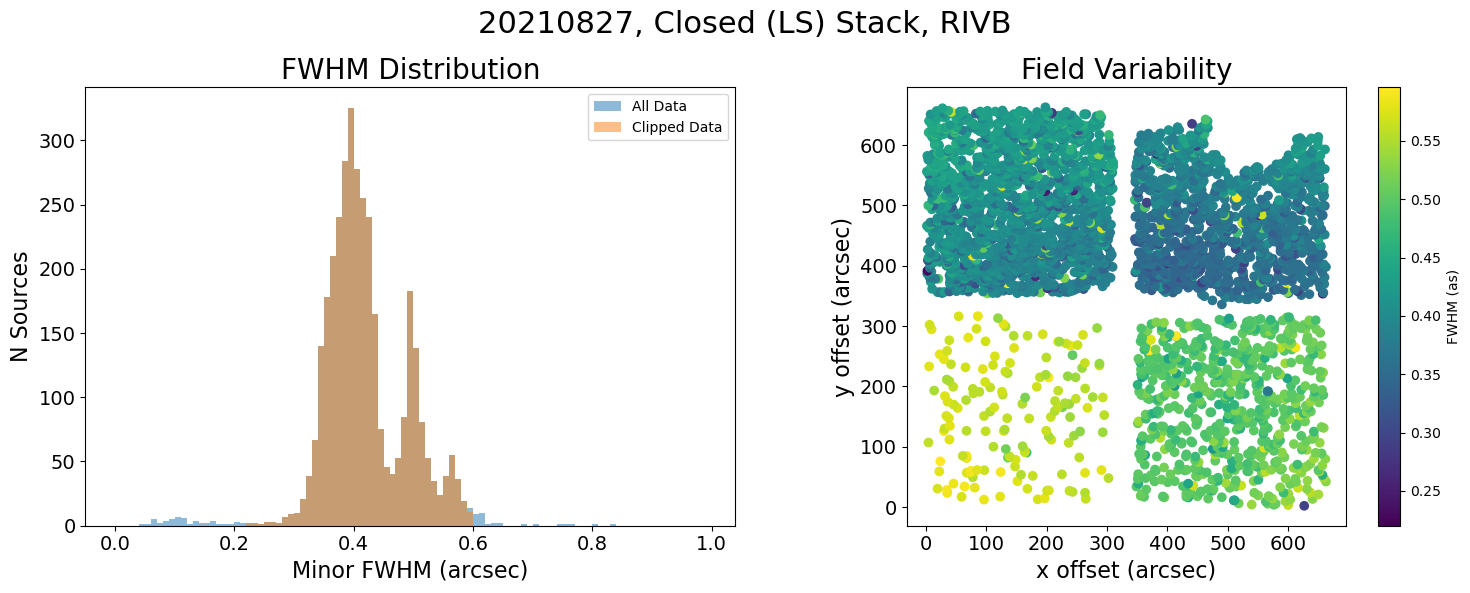

In [110]:
filt = 'RIVB'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (LS) Stack, {filt}")

### Closed (docz)

Median FWHM           = 0.358"
Median FWHM (clipped) = 0.356"
Mean FWHM             = 0.549"
Mean FWHM (clipped)   = 0.369"
Stddev FWHM           = 3.385"
Stddev FWHM (clipped) = 0.060"


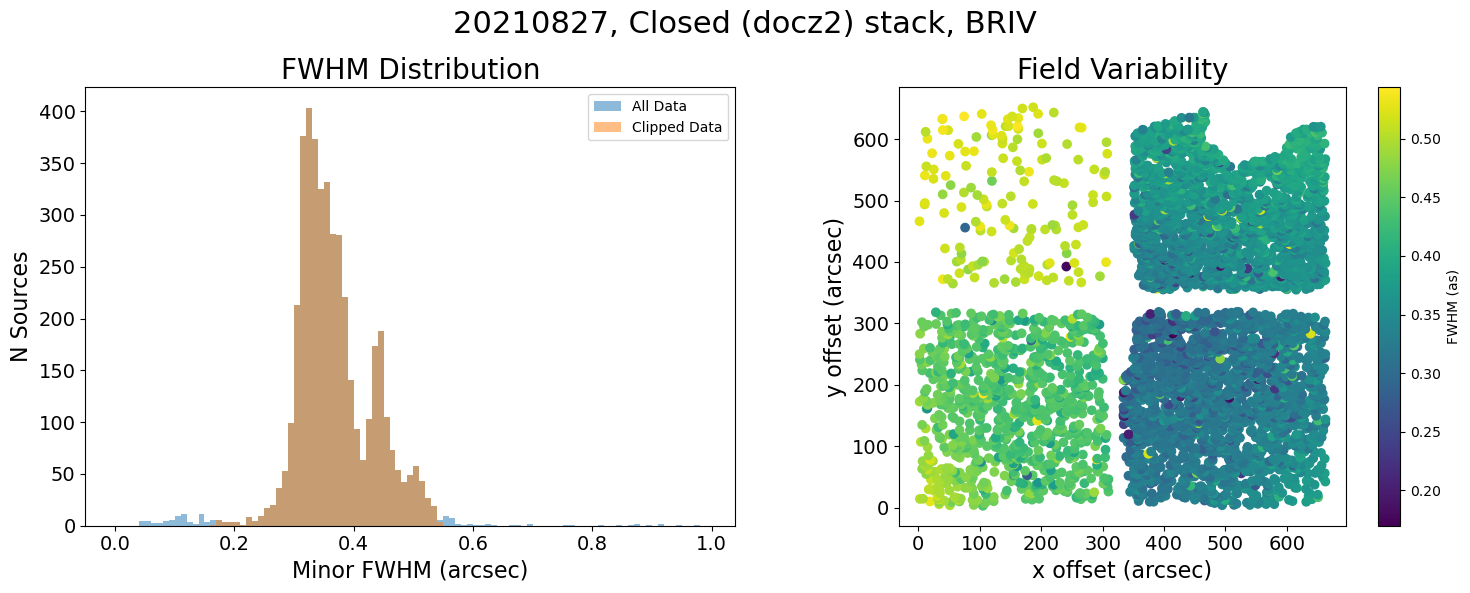

In [111]:
filt = 'BRIV'
img_file = stack_dir + f'fld2_stack_docz2_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_docz2_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (docz2) stack, {filt}")

Median FWHM           = 0.405"
Median FWHM (clipped) = 0.405"
Mean FWHM             = 0.589"
Mean FWHM (clipped)   = 0.421"
Stddev FWHM           = 8.283"
Stddev FWHM (clipped) = 0.063"


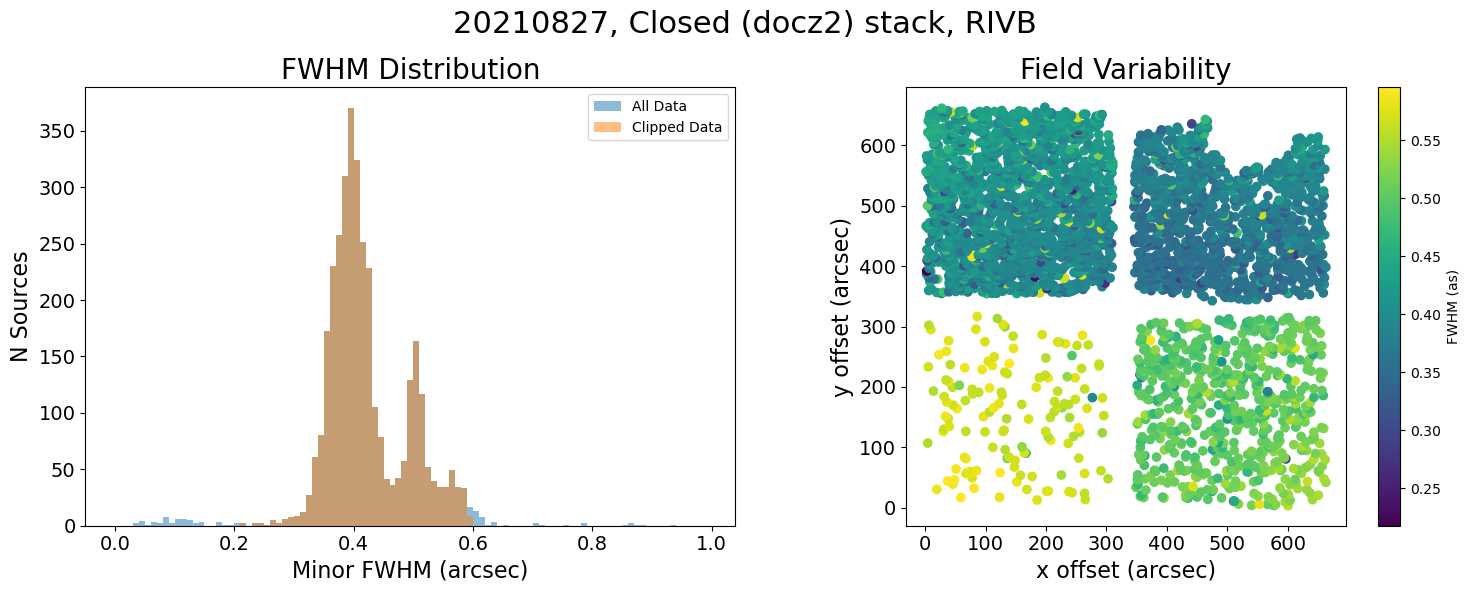

In [112]:
filt = 'RIVB'
img_file = stack_dir + f'fld2_stack_docz2_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_docz2_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (docz2) stack, {filt}")

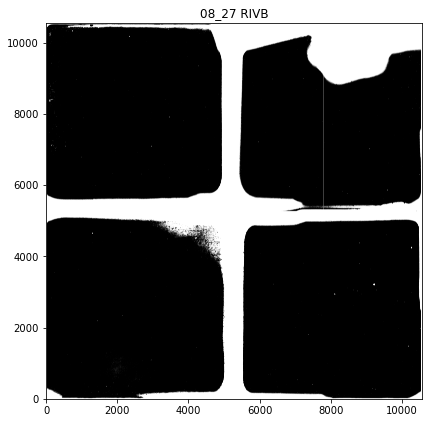

In [16]:
## What masks are we using? how are they different between orientations?
mask_dir = root_dir + "reduce/calib/"

hdul = fits.open(mask_dir +  "mask_RIVB.fits")

data = hdul[0].data

fig = plt.figure(figsize=(6,6))
plt.title("08_27 RIVB")
im = plt.imshow(data, origin ='lower', cmap='gray')
plt.tight_layout()
plt.show()
hdul.close()

Median FWHM           = 0.407"
Median FWHM (clipped) = 0.407"
Mean FWHM             = 0.458"
Mean FWHM (clipped)   = 0.421"
Stddev FWHM           = 0.897"
Stddev FWHM (clipped) = 0.063"


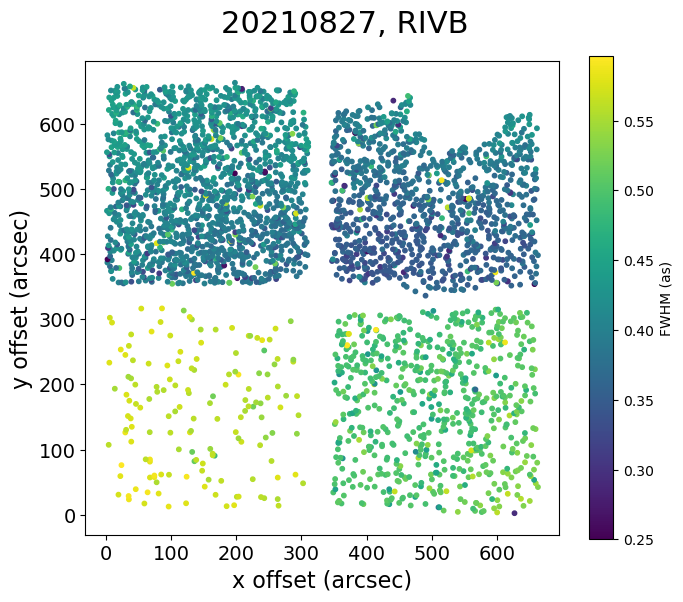

In [328]:
filt = 'RIVB'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var_small(img_file, starlist, f"{night}, {filt}")

Median FWHM           = 0.355"
Median FWHM (clipped) = 0.353"
Mean FWHM             = 0.513"
Mean FWHM (clipped)   = 0.366"
Stddev FWHM           = 0.976"
Stddev FWHM (clipped) = 0.065"


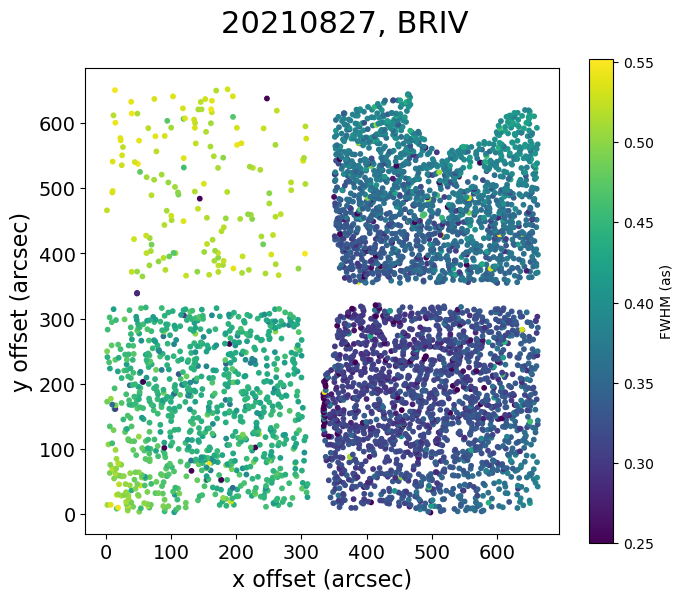

In [331]:
filt = 'BRIV'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var_small(img_file, starlist, f"{night}, {filt}")